In [1]:
!pip install catboost

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

c:\Users\DIPEN\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\DIPEN\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dipu20/heart-disease/refs/heads/main/Framingham%20Dataset.csv?token=GHSAT0AAAAAADNL63YH3EVMJNIJDJFOM2TU2HTEPTA')
pd.set_option('display.max_columns', None)
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,0,0,0,0,0,0,1,NaN,NaN,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,0,0,0,0,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,0,0,0,0,0,2156,2,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [4]:
df.describe()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1.162700e+04,11627.000000,11218.000000,11627.000000,11627.000000,11627.000000,11627.000000,11548.000000,11575.000000,11627.000000,11034.000000,11621.000000,10187.000000,11332.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,3027.000000,3026.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,5.004741e+06,1.568074,241.162418,54.792810,136.324116,83.037757,0.432528,8.250346,25.877349,0.045584,0.085554,76.781516,84.124865,1.990205,0.072418,0.053926,0.032167,0.013073,0.459620,1957.019438,1.899286,49.364718,176.466953,0.303346,0.163585,0.099252,0.153780,0.271609,0.091253,0.249333,0.743270,7241.556893,7593.846736,7543.036725,7008.153608,7660.880021,7166.082996,7854.102950,3598.956395
std,2.900877e+06,0.495366,45.368030,9.564299,22.798625,11.660144,0.495448,12.186888,4.102640,0.208589,0.279717,12.463359,24.993781,1.027463,0.259189,0.225882,0.176450,0.113592,0.498388,1758.776927,0.807407,15.626669,46.863393,0.459723,0.369914,0.299013,0.360753,0.444809,0.287981,0.432646,0.436848,2477.780010,2136.730285,2192.120311,2641.344513,2011.077091,2541.668477,1788.369623,3464.164659
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,0.000000,37.000000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,2.474378e+06,1.000000,210.000000,48.000000,120.000000,75.000000,0.000000,0.000000,23.095000,0.000000,0.000000,69.000000,72.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.000000,145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6224.000000,7212.000000,7049.500000,5598.500000,7295.000000,6004.000000,7797.500000,0.000000
50%,5.006008e+06,2.000000,238.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.480000,0.000000,0.000000,75.000000,80.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156.000000,2.000000,48.000000,173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2429.000000
75%,7.472730e+06,2.000000,268.000000,62.000000,149.000000,90.000000,1.000000,20.000000,28.070000,0.000000,0.000000,85.000000,89.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4252.500000,3.000000,58.000000,205.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7329.000000
max,9.999312e+06,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,1.000000,220.000000,478.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4854.000000,3.000000,189.000000,565.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [5]:
df.isnull().sum()

RANDID         0
SEX            0
TOTCHOL      409
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
DIABETES       0
BPMEDS       593
HEARTRTE       6
GLUCOSE     1440
educ         295
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
TIME           0
PERIOD         0
HDLC        8600
LDLC        8601
DEATH          0
ANGINA         0
HOSPMI         0
MI_FCHD        0
ANYCHD         0
STROKE         0
CVD            0
HYPERTEN       0
TIMEAP         0
TIMEMI         0
TIMEMIFC       0
TIMECHD        0
TIMESTRK       0
TIMECVD        0
TIMEDTH        0
TIMEHYP        0
dtype: int64

In [6]:
df.rename(columns={'CURSMOKE': 'CURRENT SMOKER', 'CIGPDAY': 'CIGS PER DAY', 'HEARTRTE': 'HEARTRATE', 'educ': 'EDUCATION', 'PREVSTRK': 'PREVALENT STROKE', 'PREVHYP': 'PREVALENTHYP'}, inplace=True)

In [7]:
df.isnull().sum()

RANDID                 0
SEX                    0
TOTCHOL              409
AGE                    0
SYSBP                  0
DIABP                  0
CURRENT SMOKER         0
CIGS PER DAY          79
BMI                   52
DIABETES               0
BPMEDS               593
HEARTRATE              6
GLUCOSE             1440
EDUCATION            295
PREVCHD                0
PREVAP                 0
PREVMI                 0
PREVALENT STROKE       0
PREVALENTHYP           0
TIME                   0
PERIOD                 0
HDLC                8600
LDLC                8601
DEATH                  0
ANGINA                 0
HOSPMI                 0
MI_FCHD                0
ANYCHD                 0
STROKE                 0
CVD                    0
HYPERTEN               0
TIMEAP                 0
TIMEMI                 0
TIMEMIFC               0
TIMECHD                0
TIMESTRK               0
TIMECVD                0
TIMEDTH                0
TIMEHYP                0
dtype: int64

In [8]:
df.fillna({'TOTCHOL':0},inplace=True)
df.fillna({'CIGS PER DAY':0},inplace=True)
df.fillna({'BPMEDS':0},inplace=True)
df.fillna({'EDUCATION':0},inplace=True)
df.fillna({'BMI':0},inplace=True)
df.fillna({'HEARTRATE':0},inplace=True)
df.fillna({'GLUCOSE':0},inplace=True)
df.fillna({'HDLC':0},inplace=True)
df.fillna({'LDLC':0},inplace=True)

In [9]:
df.isnull().sum()

RANDID              0
SEX                 0
TOTCHOL             0
AGE                 0
SYSBP               0
DIABP               0
CURRENT SMOKER      0
CIGS PER DAY        0
BMI                 0
DIABETES            0
BPMEDS              0
HEARTRATE           0
GLUCOSE             0
EDUCATION           0
PREVCHD             0
PREVAP              0
PREVMI              0
PREVALENT STROKE    0
PREVALENTHYP        0
TIME                0
PERIOD              0
HDLC                0
LDLC                0
DEATH               0
ANGINA              0
HOSPMI              0
MI_FCHD             0
ANYCHD              0
STROKE              0
CVD                 0
HYPERTEN            0
TIMEAP              0
TIMEMI              0
TIMEMIFC            0
TIMECHD             0
TIMESTRK            0
TIMECVD             0
TIMEDTH             0
TIMEHYP             0
dtype: int64

array([[<AxesSubplot:title={'center':'RANDID'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'TOTCHOL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SYSBP'}>,
        <AxesSubplot:title={'center':'DIABP'}>],
       [<AxesSubplot:title={'center':'CURRENT SMOKER'}>,
        <AxesSubplot:title={'center':'CIGS PER DAY'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DIABETES'}>,
        <AxesSubplot:title={'center':'BPMEDS'}>,
        <AxesSubplot:title={'center':'HEARTRATE'}>],
       [<AxesSubplot:title={'center':'GLUCOSE'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'PREVCHD'}>,
        <AxesSubplot:title={'center':'PREVAP'}>,
        <AxesSubplot:title={'center':'PREVMI'}>,
        <AxesSubplot:title={'center':'PREVALENT STROKE'}>],
       [<AxesSubplot:title={'center':'PREVALENTHYP'}>,
        <AxesSubplot:title={'center'

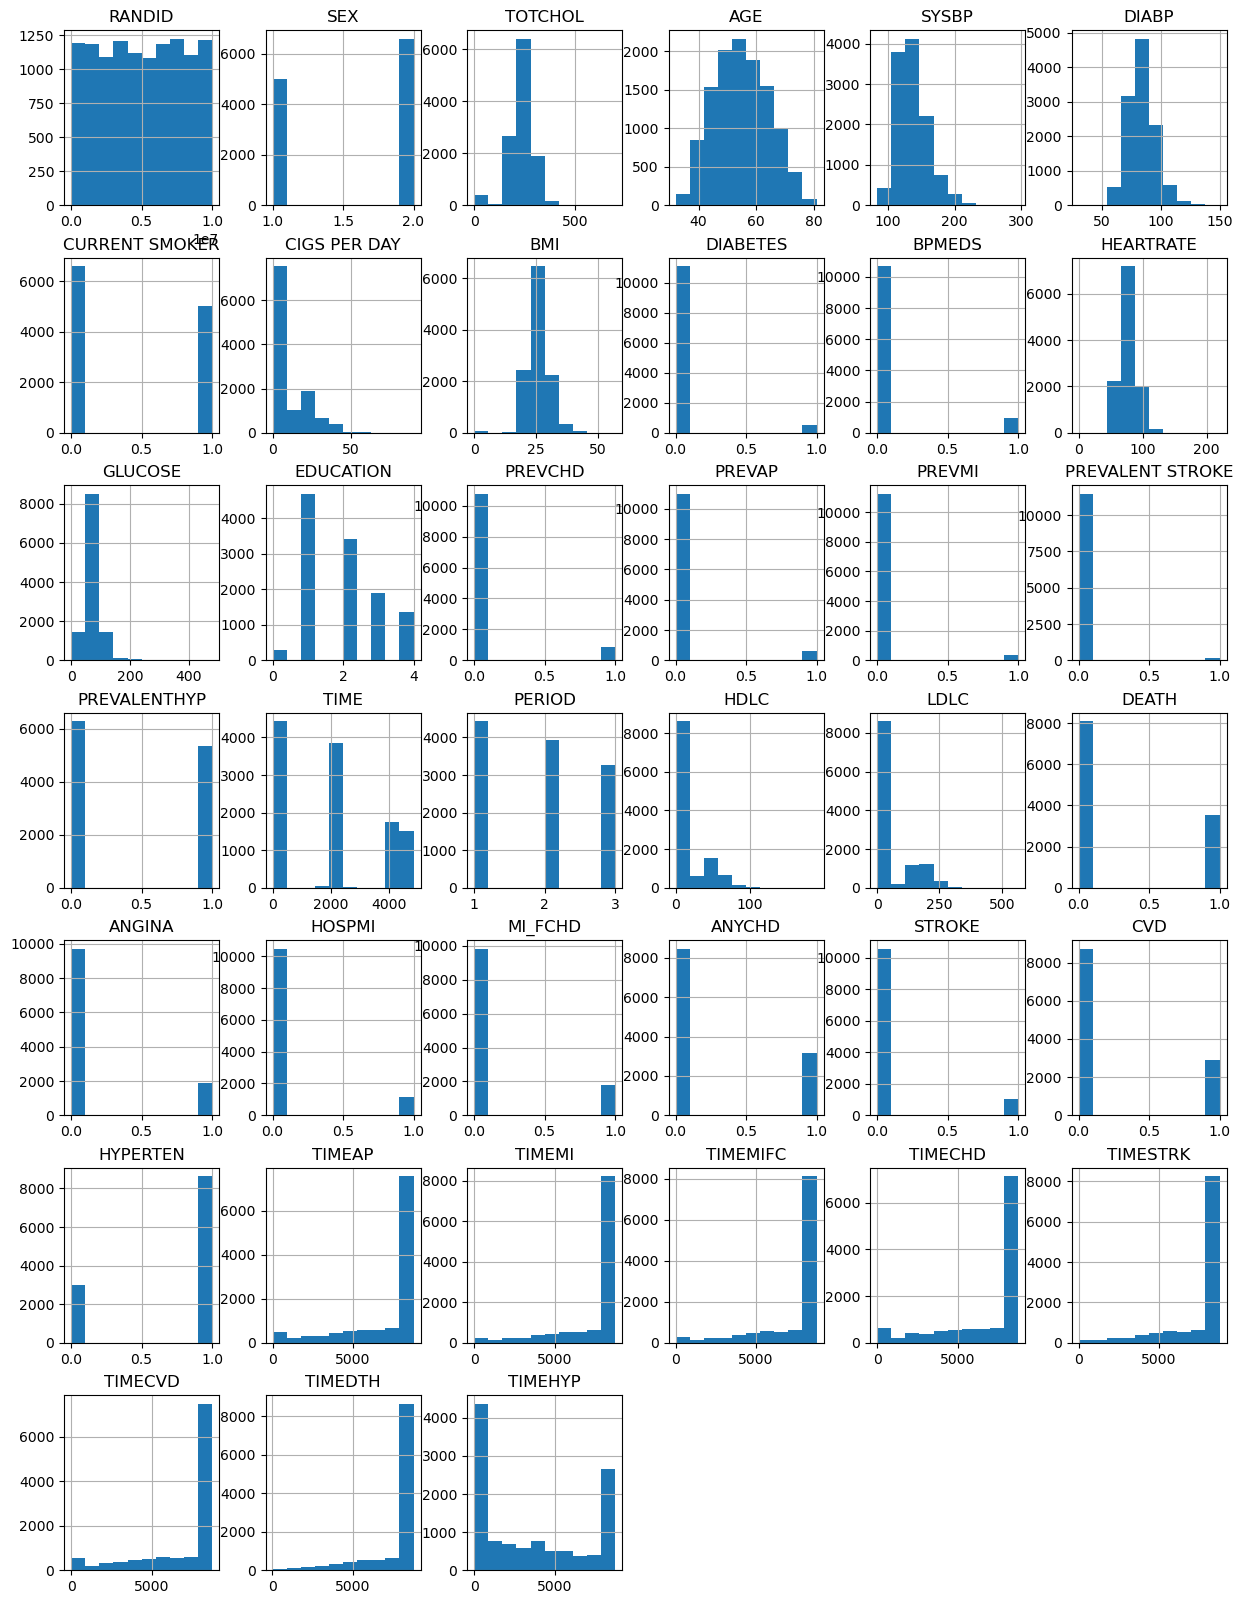

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

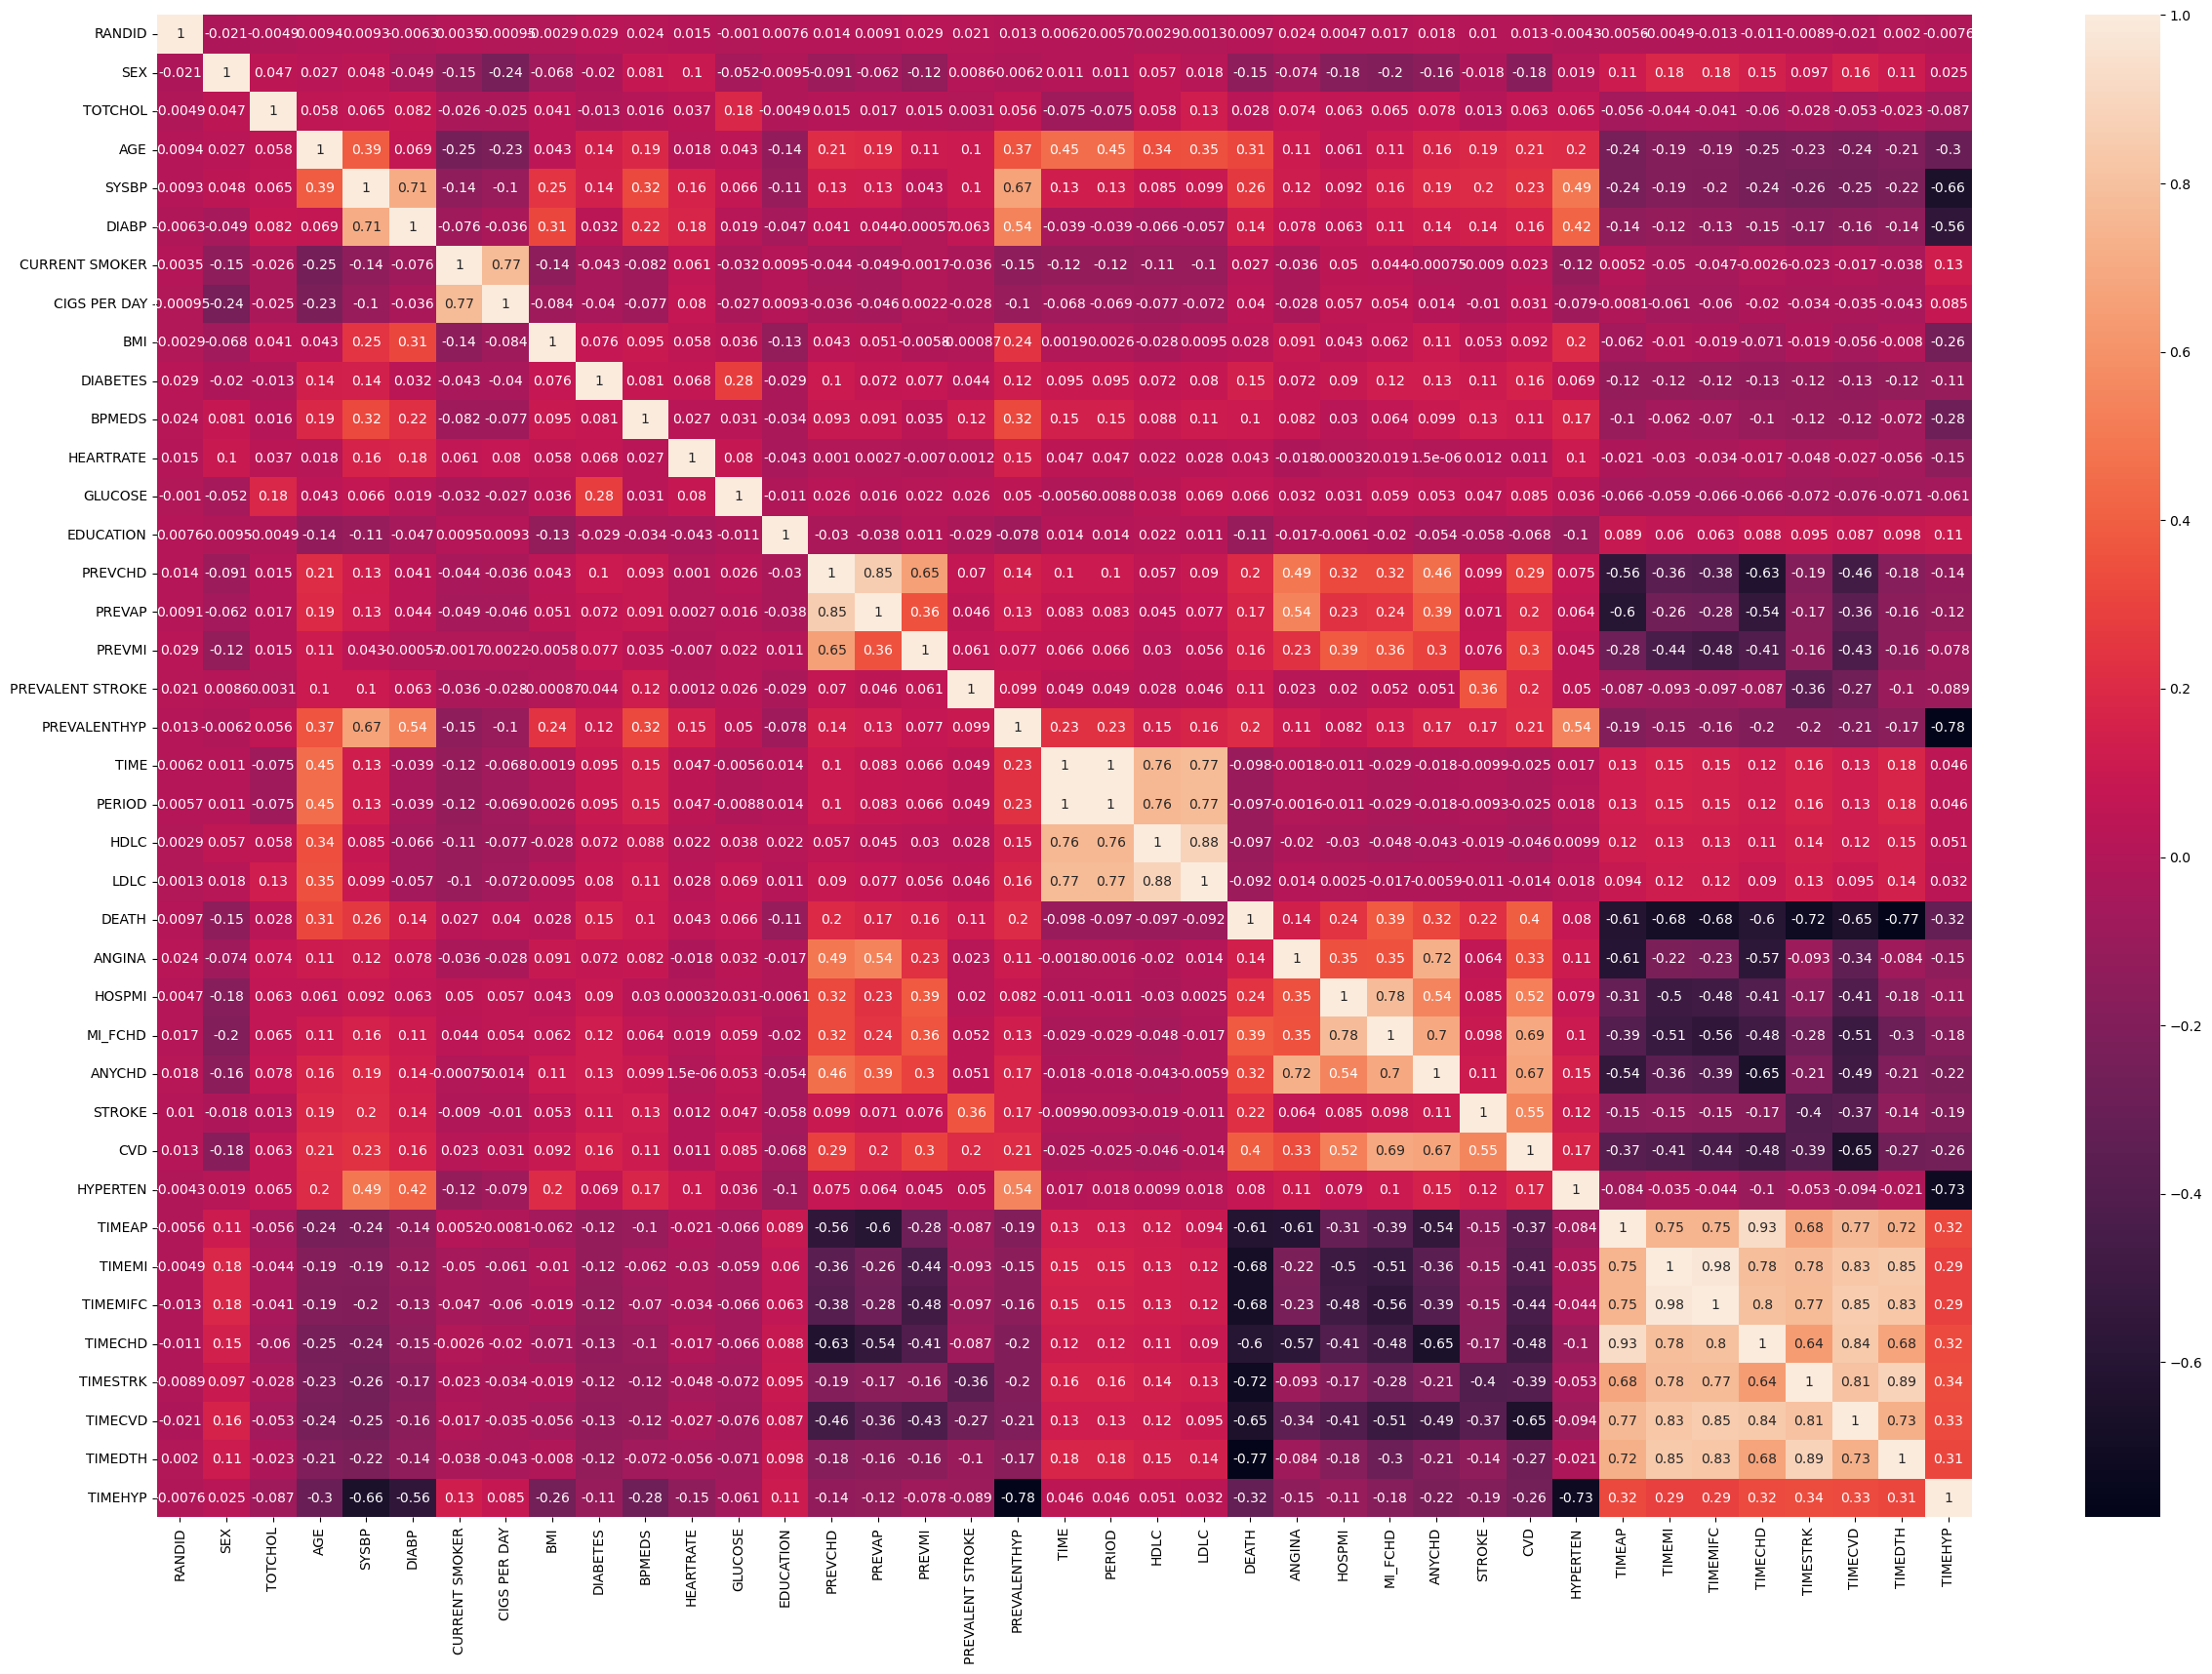

In [11]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(),annot =True)
plt.show()

In [12]:
df.nunique()

RANDID              4434
SEX                    2
TOTCHOL              300
AGE                   50
SYSBP                260
DIABP                160
CURRENT SMOKER         2
CIGS PER DAY          45
BMI                 1819
DIABETES               2
BPMEDS                 2
HEARTRATE             84
GLUCOSE              212
EDUCATION              5
PREVCHD                2
PREVAP                 2
PREVMI                 2
PREVALENT STROKE       2
PREVALENTHYP           2
TIME                 932
PERIOD                 3
HDLC                 106
LDLC                 263
DEATH                  2
ANGINA                 2
HOSPMI                 2
MI_FCHD                2
ANYCHD                 2
STROKE                 2
CVD                    2
HYPERTEN               2
TIMEAP              1606
TIMEMI              1529
TIMEMIFC            1543
TIMECHD             1716
TIMESTRK            1525
TIMECVD             1634
TIMEDTH             1419
TIMEHYP             1519
dtype: int64

In [13]:
df.dtypes

RANDID                int64
SEX                   int64
TOTCHOL             float64
AGE                   int64
SYSBP               float64
DIABP               float64
CURRENT SMOKER        int64
CIGS PER DAY        float64
BMI                 float64
DIABETES              int64
BPMEDS              float64
HEARTRATE           float64
GLUCOSE             float64
EDUCATION           float64
PREVCHD               int64
PREVAP                int64
PREVMI                int64
PREVALENT STROKE      int64
PREVALENTHYP          int64
TIME                  int64
PERIOD                int64
HDLC                float64
LDLC                float64
DEATH                 int64
ANGINA                int64
HOSPMI                int64
MI_FCHD               int64
ANYCHD                int64
STROKE                int64
CVD                   int64
HYPERTEN              int64
TIMEAP                int64
TIMEMI                int64
TIMEMIFC              int64
TIMECHD               int64
TIMESTRK            

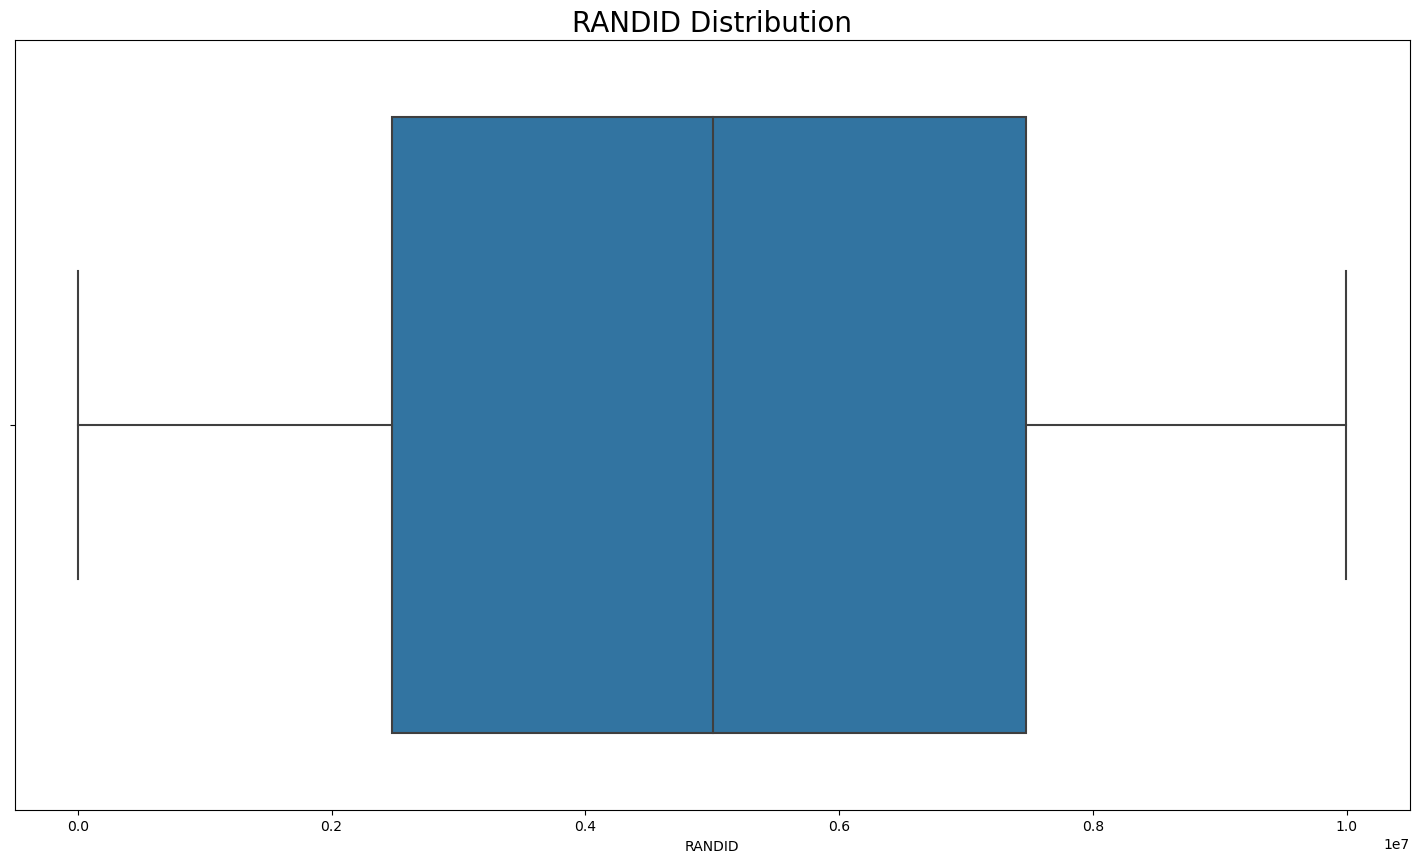

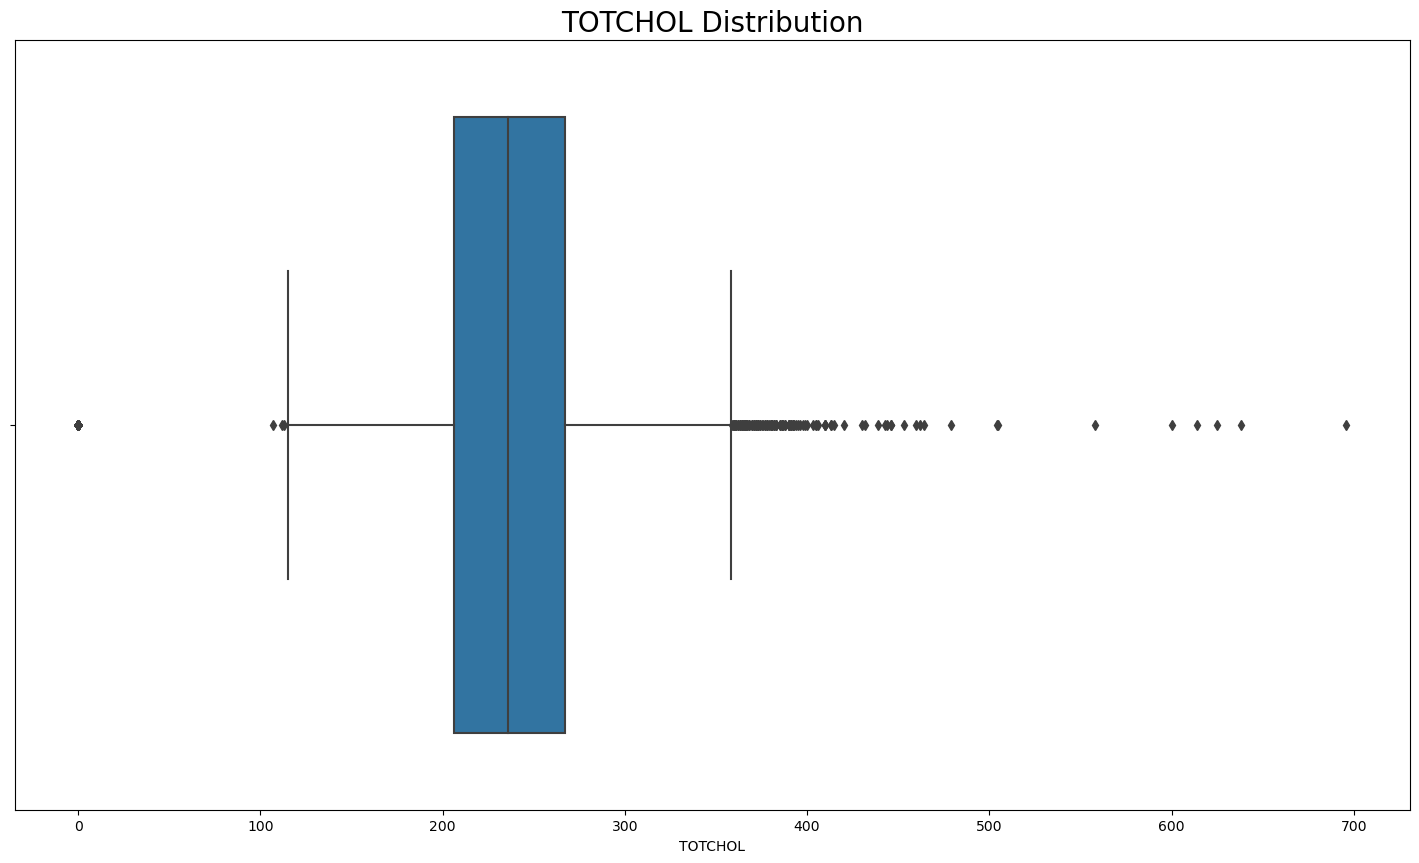

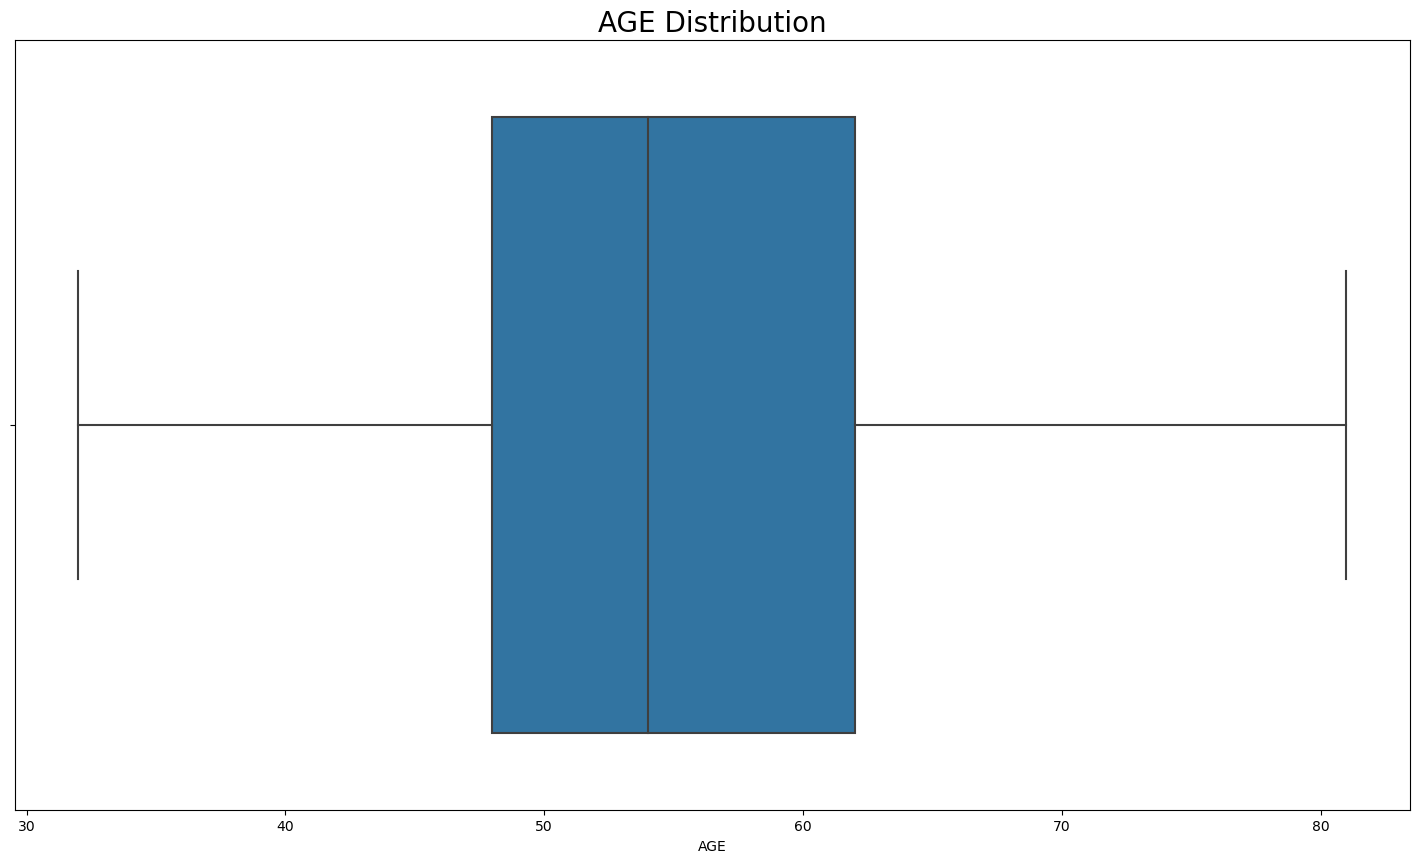

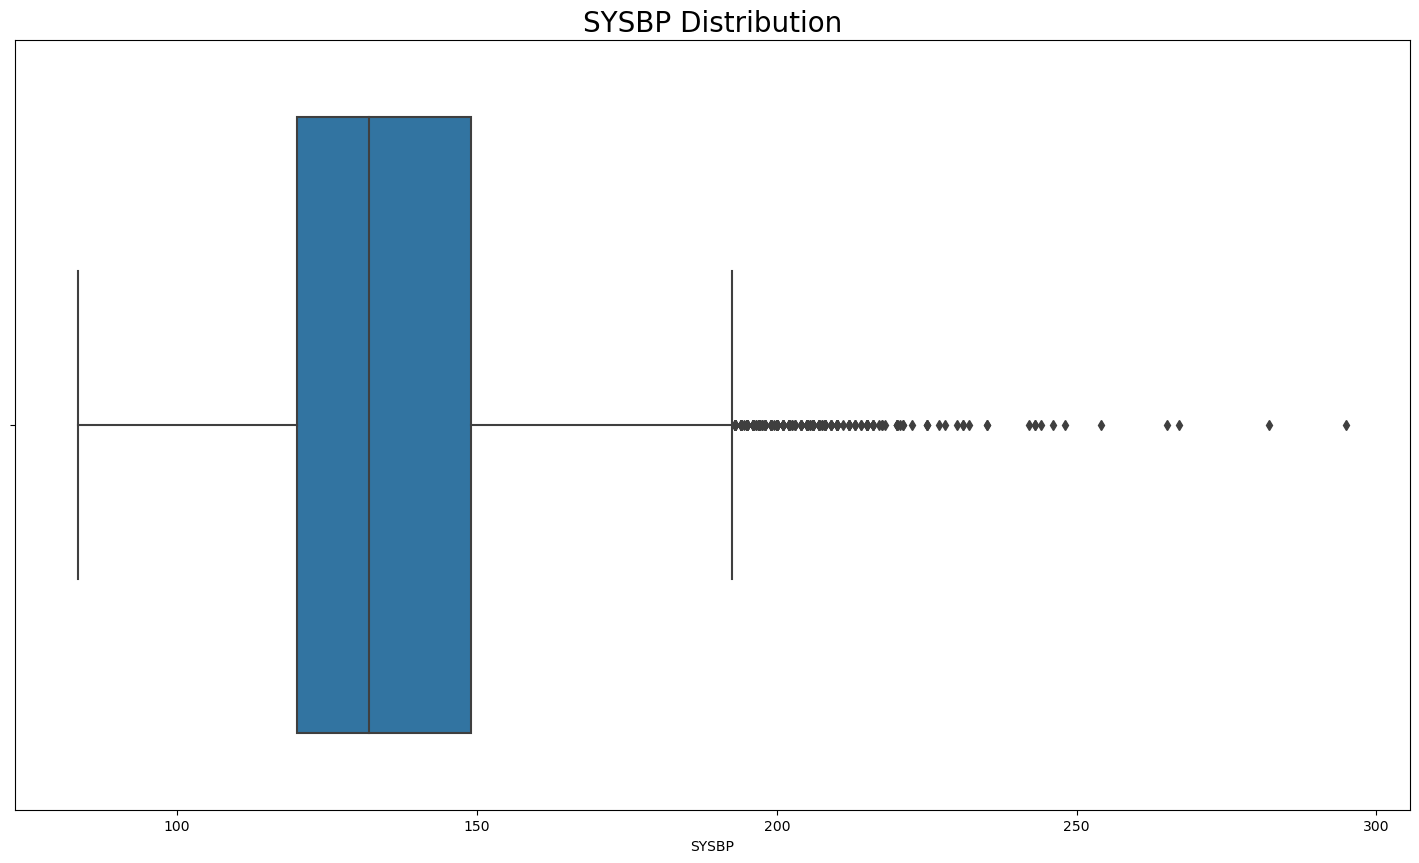

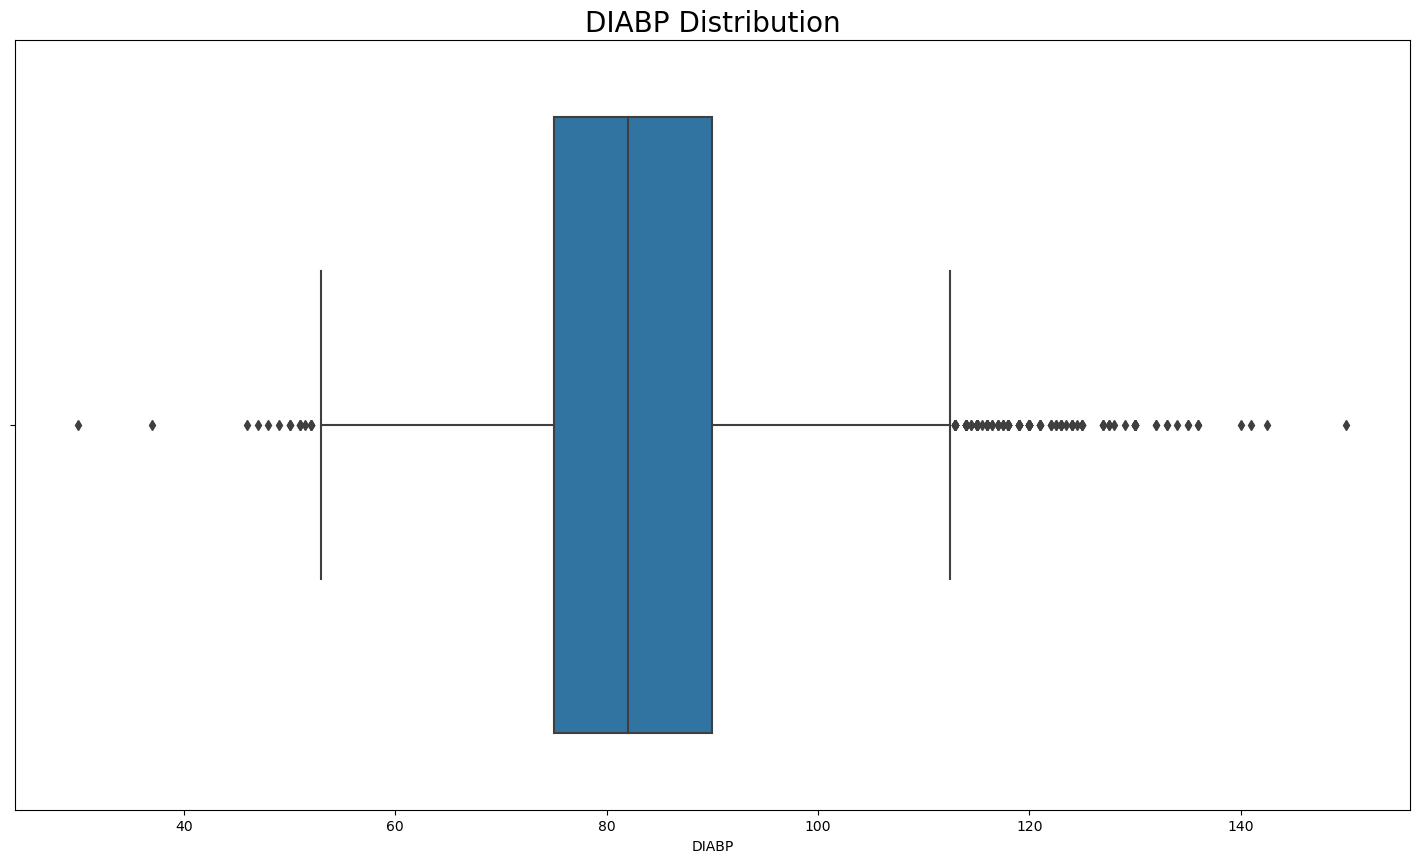

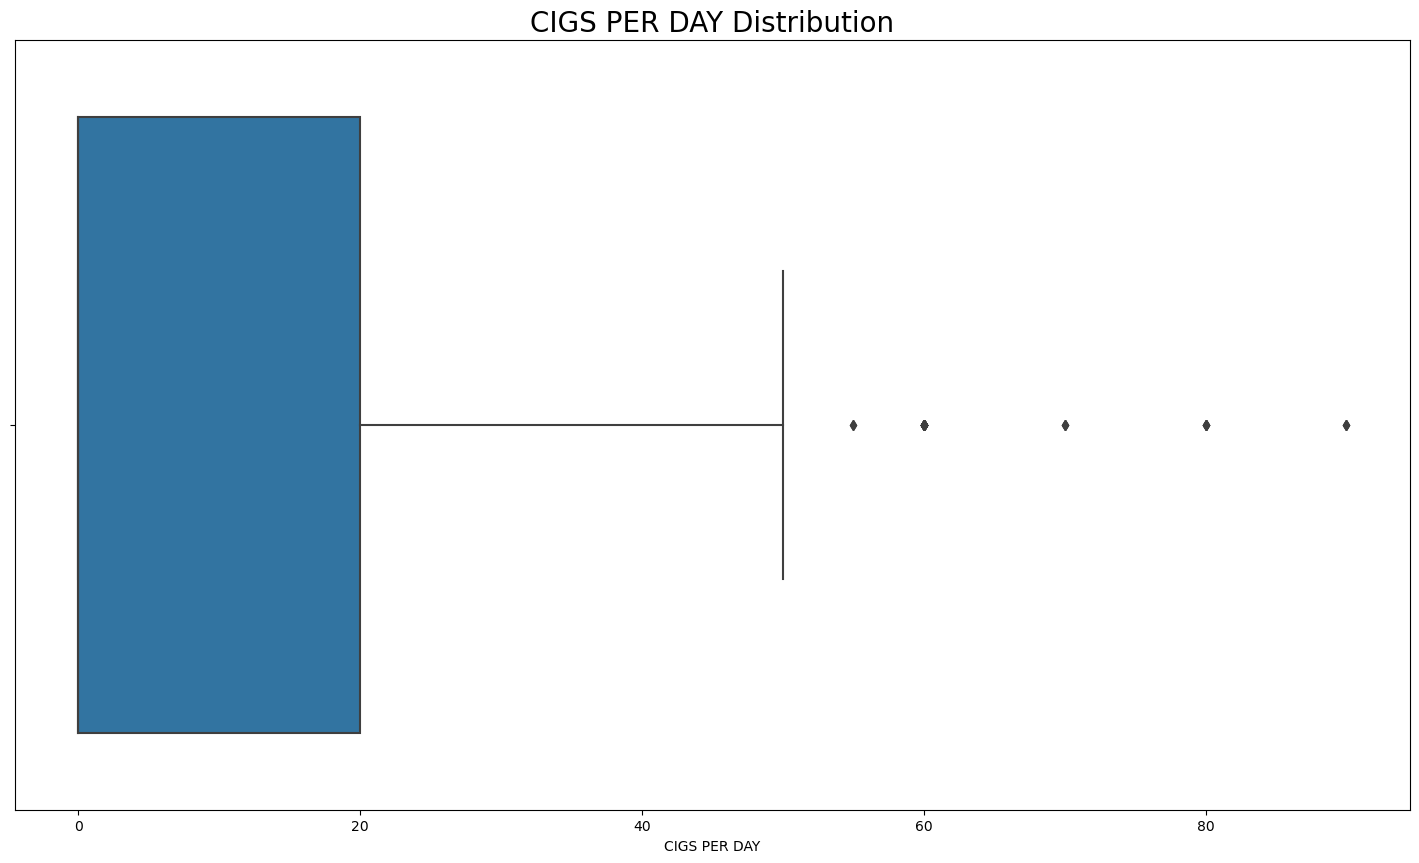

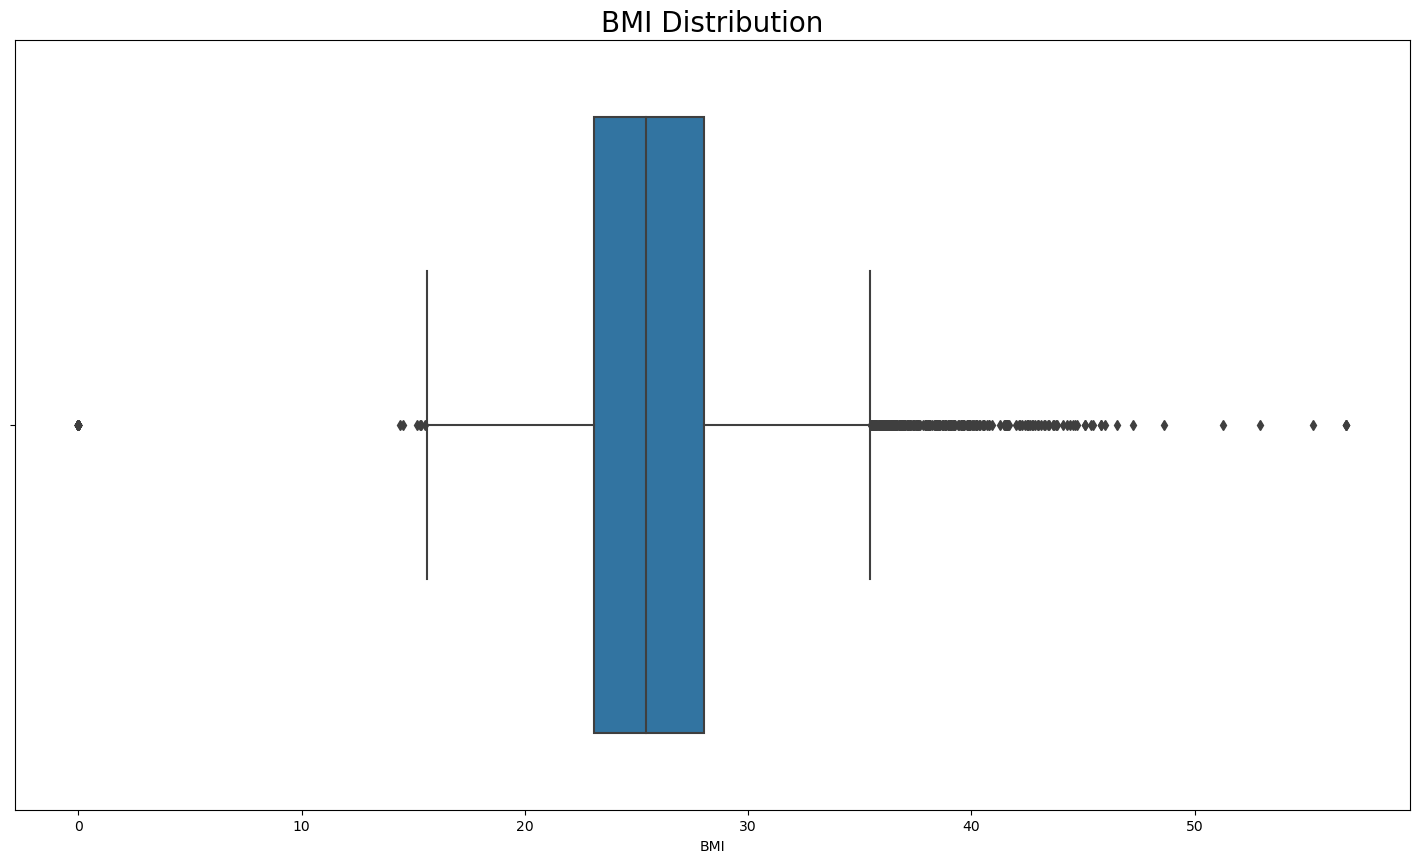

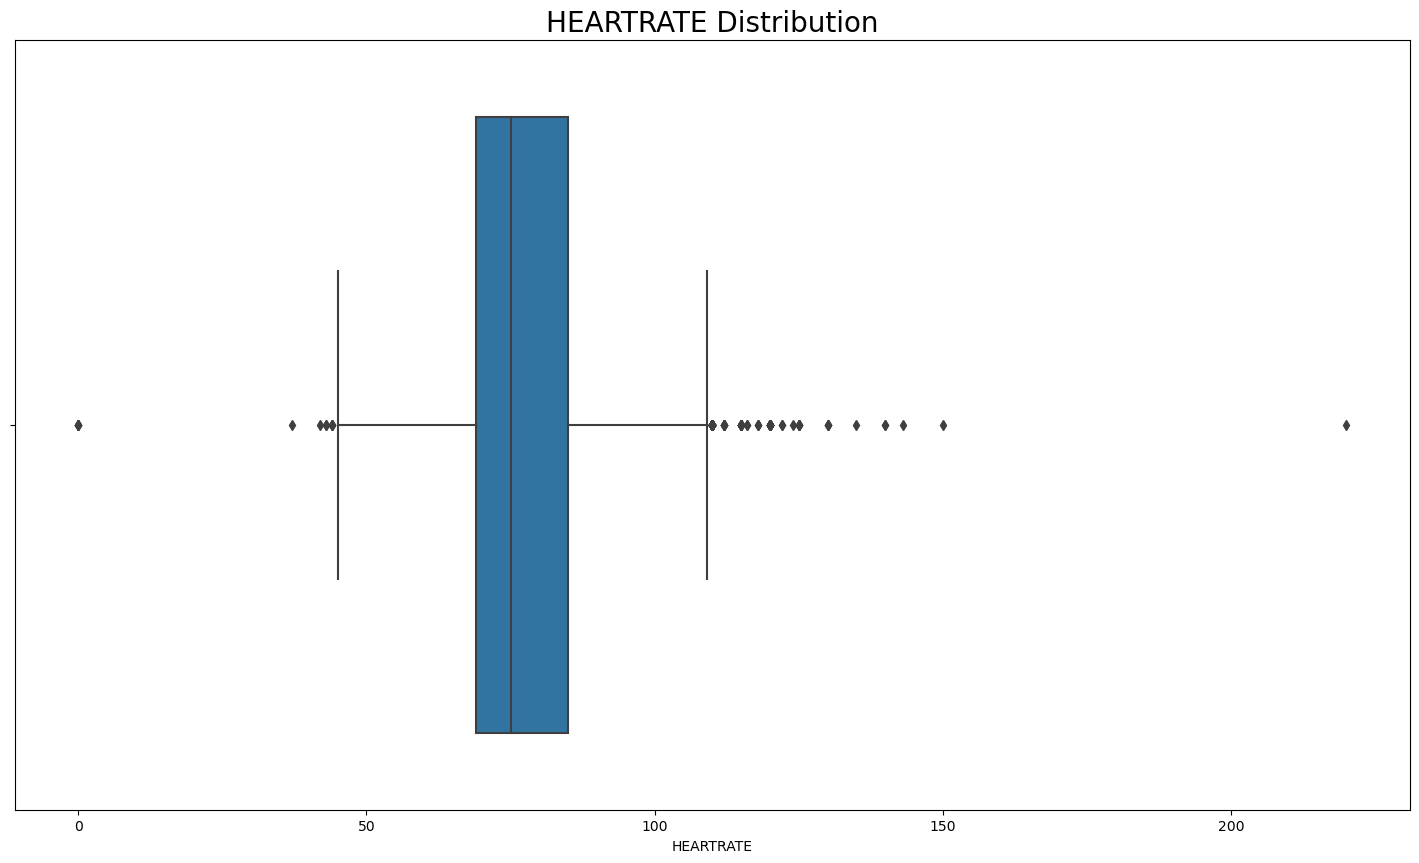

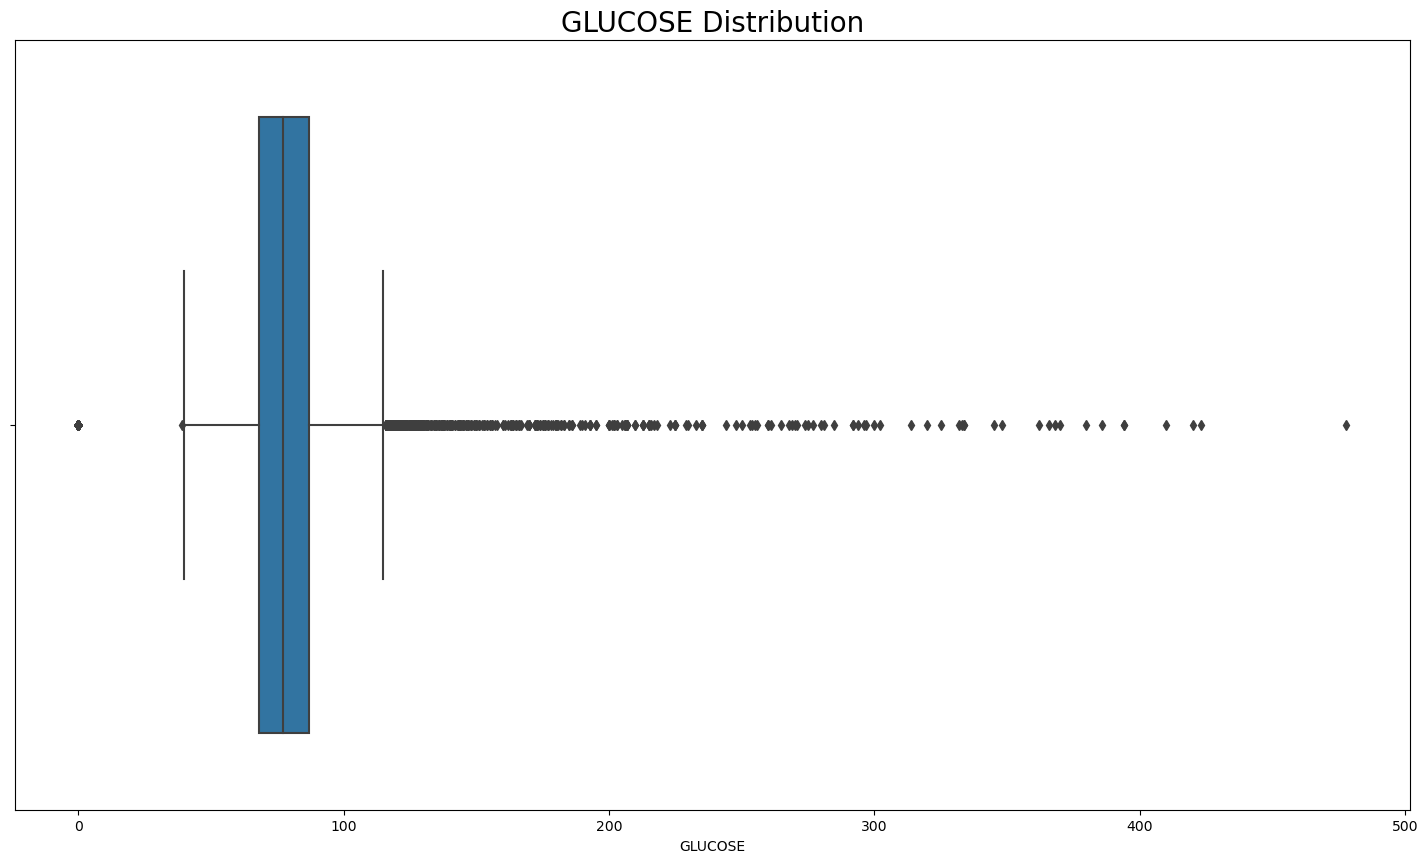

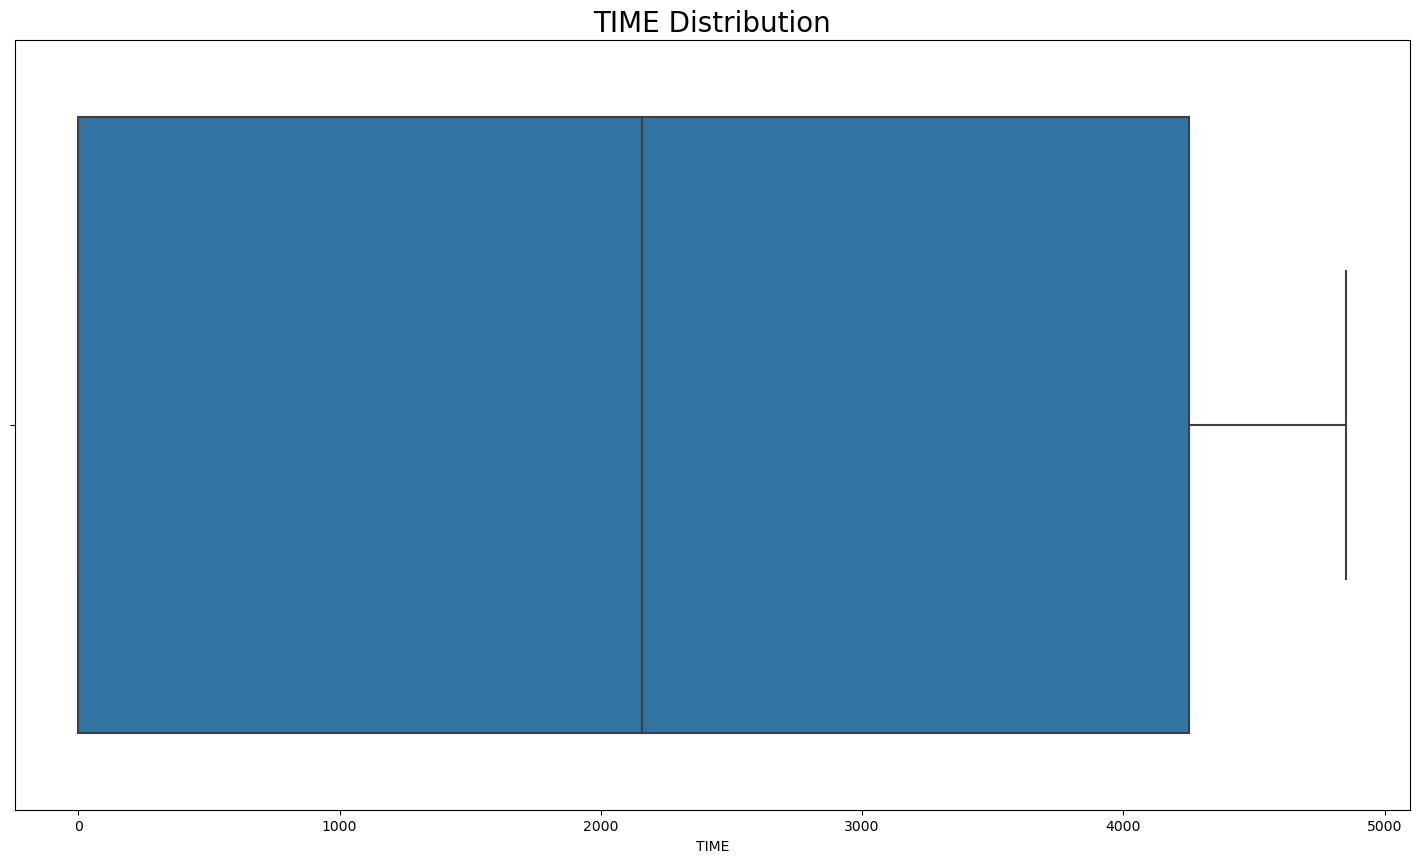

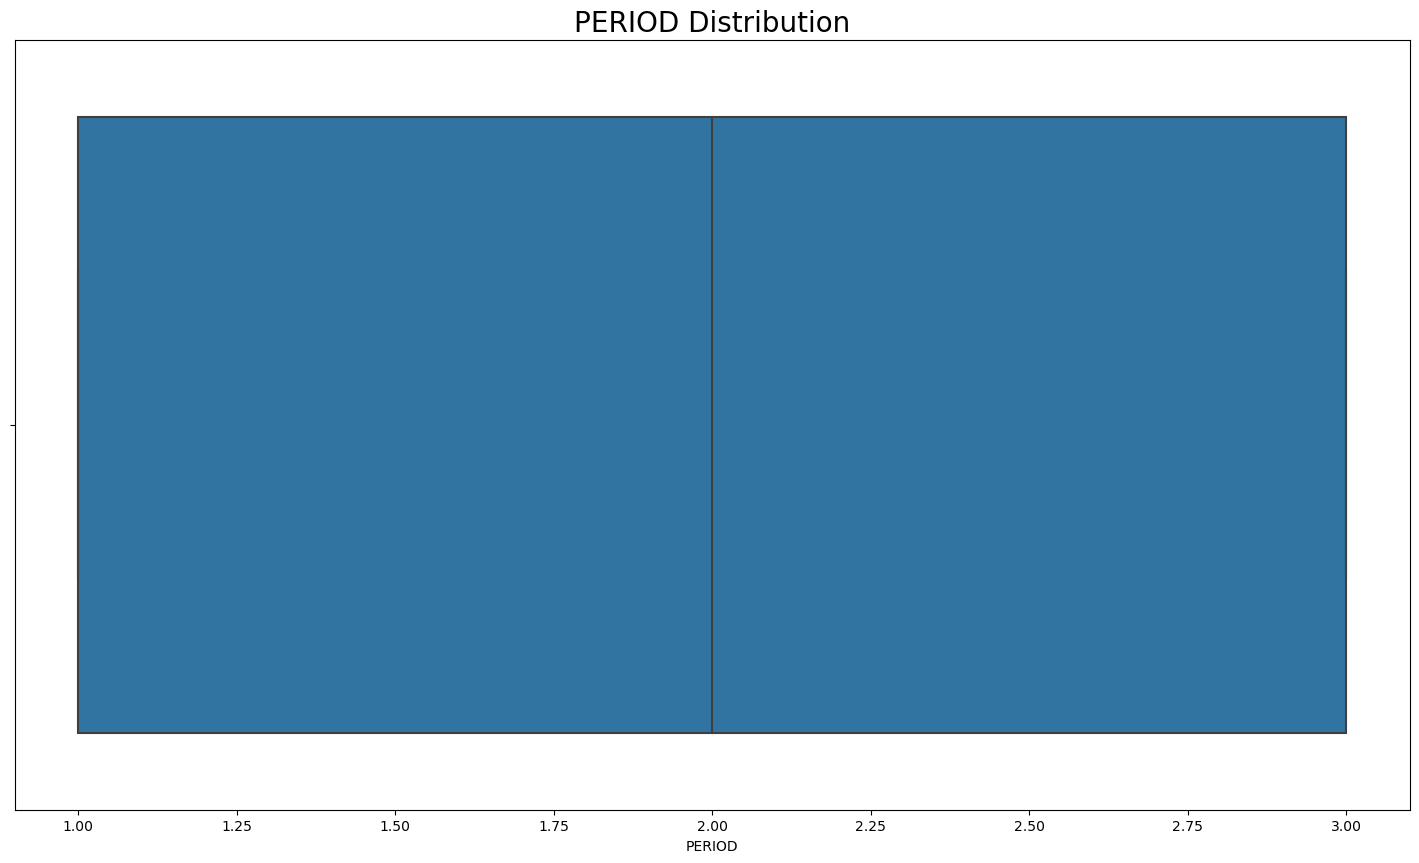

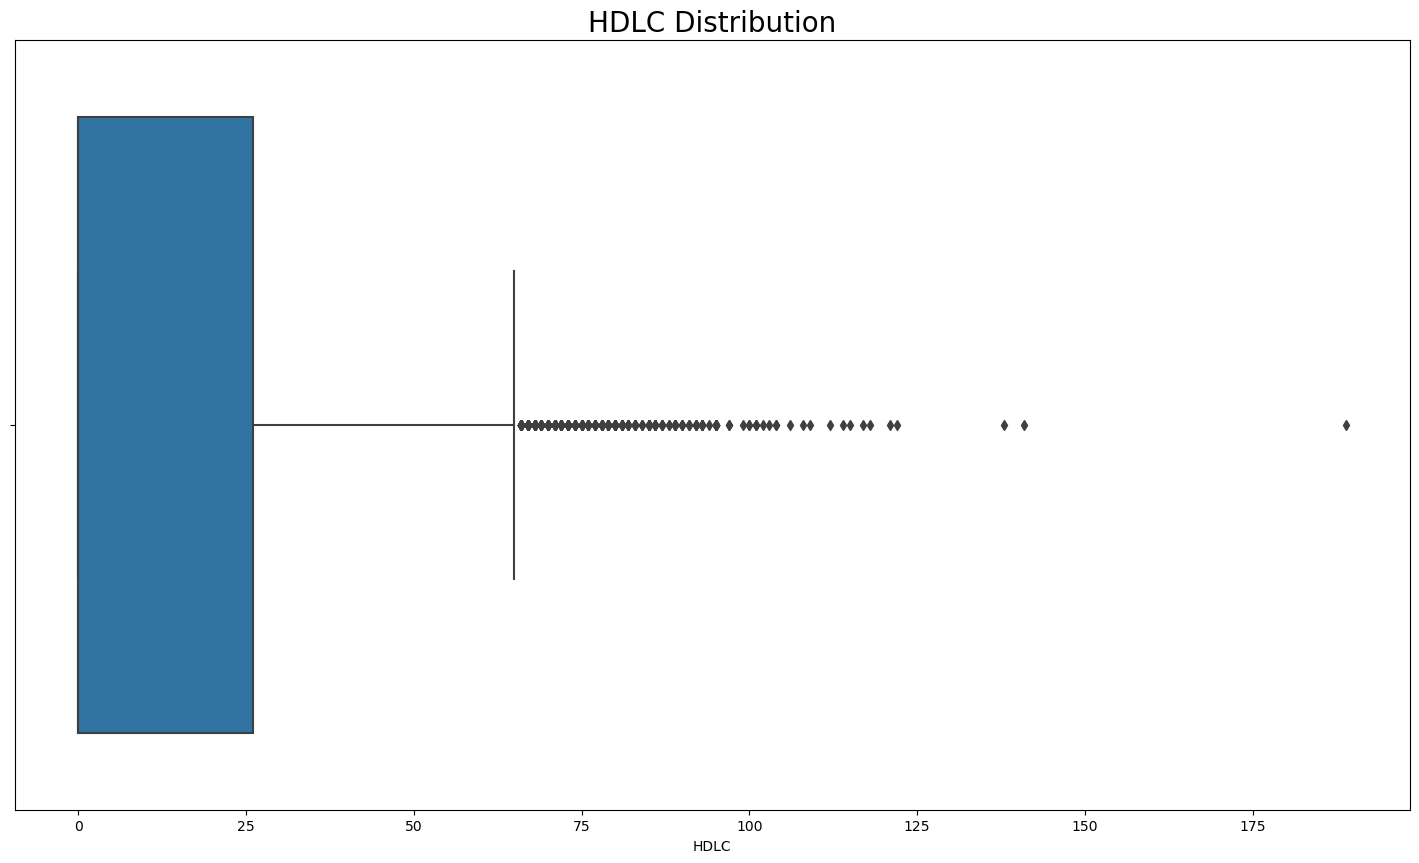

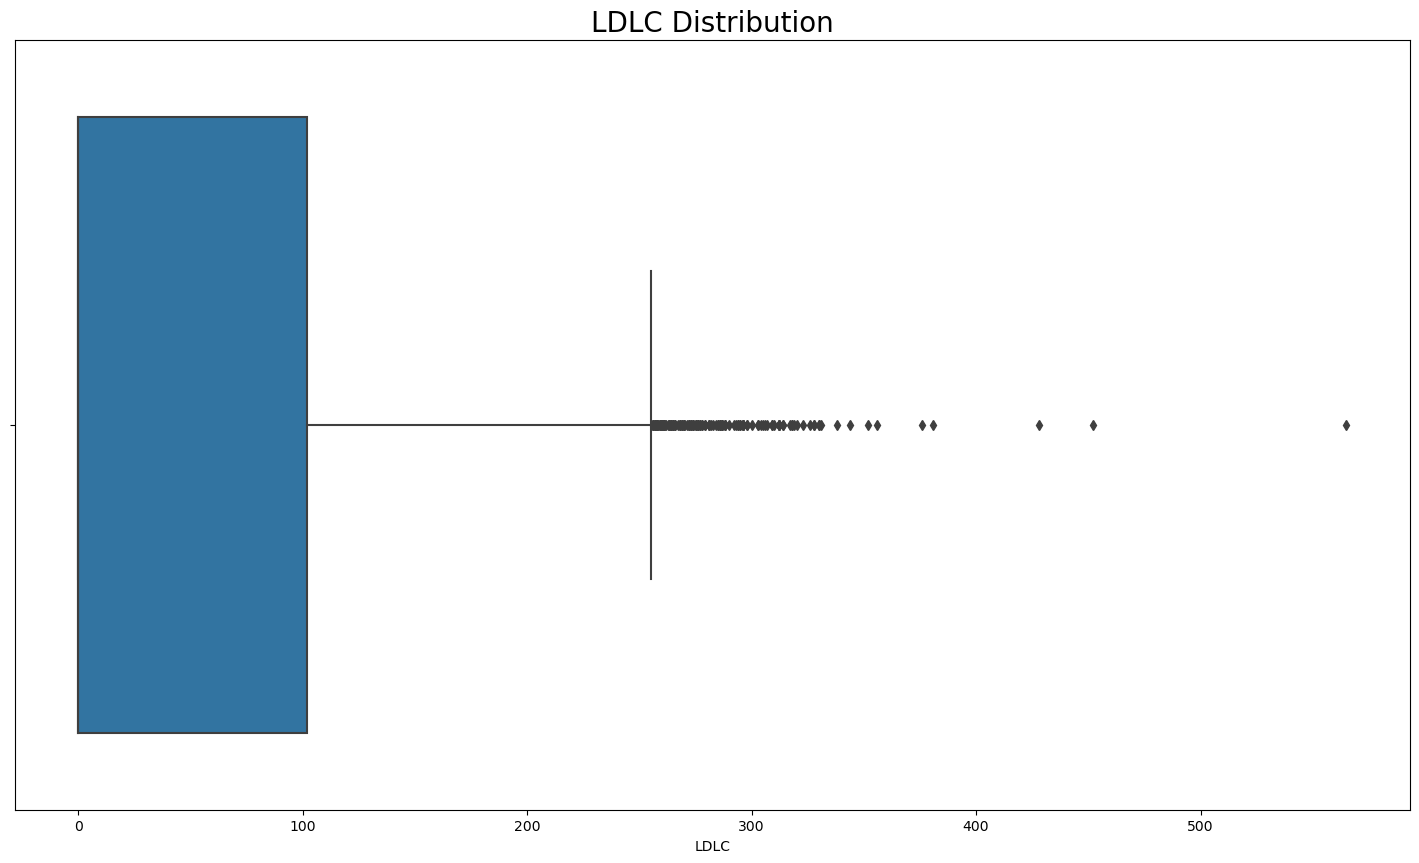

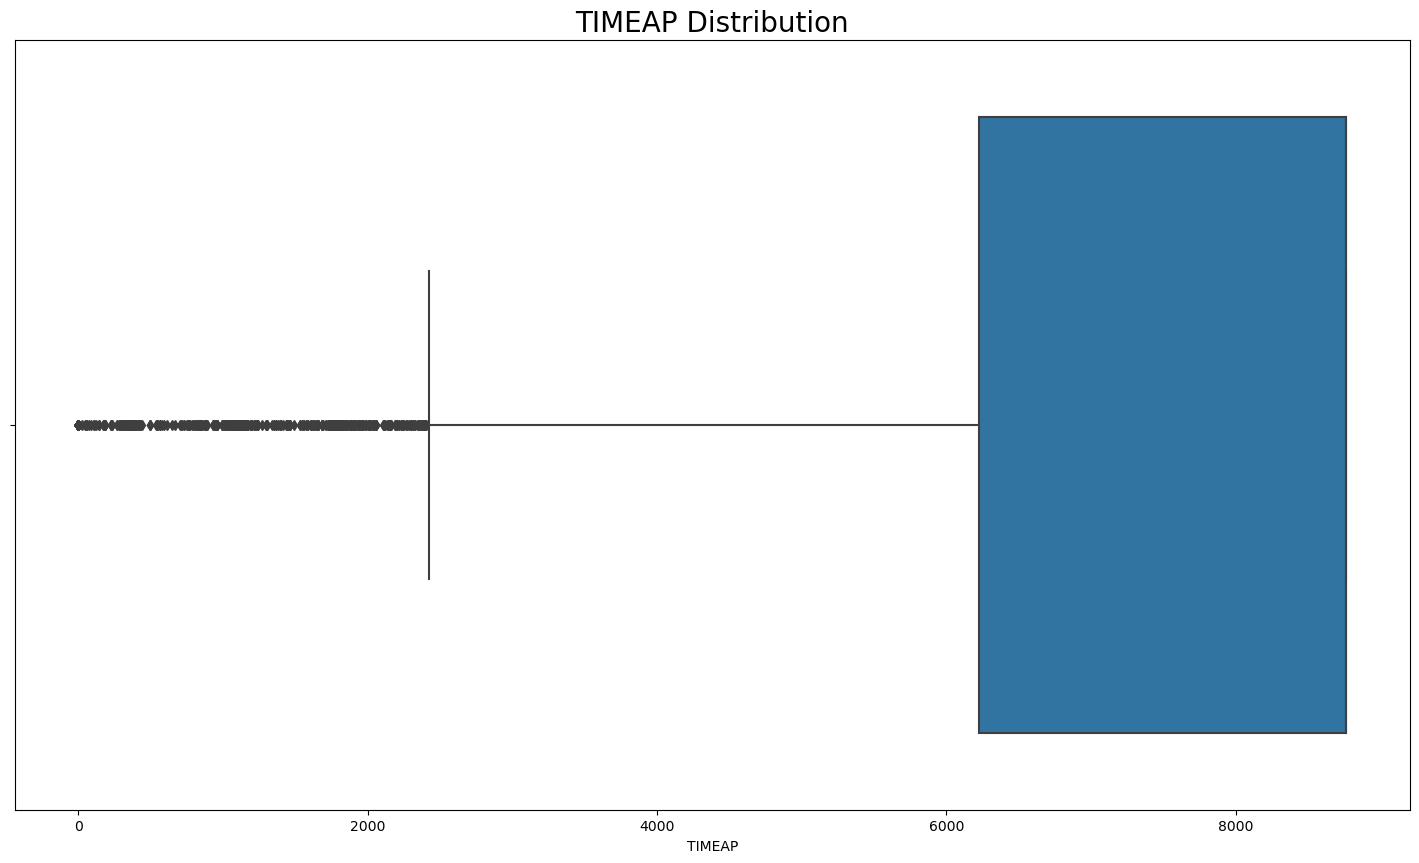

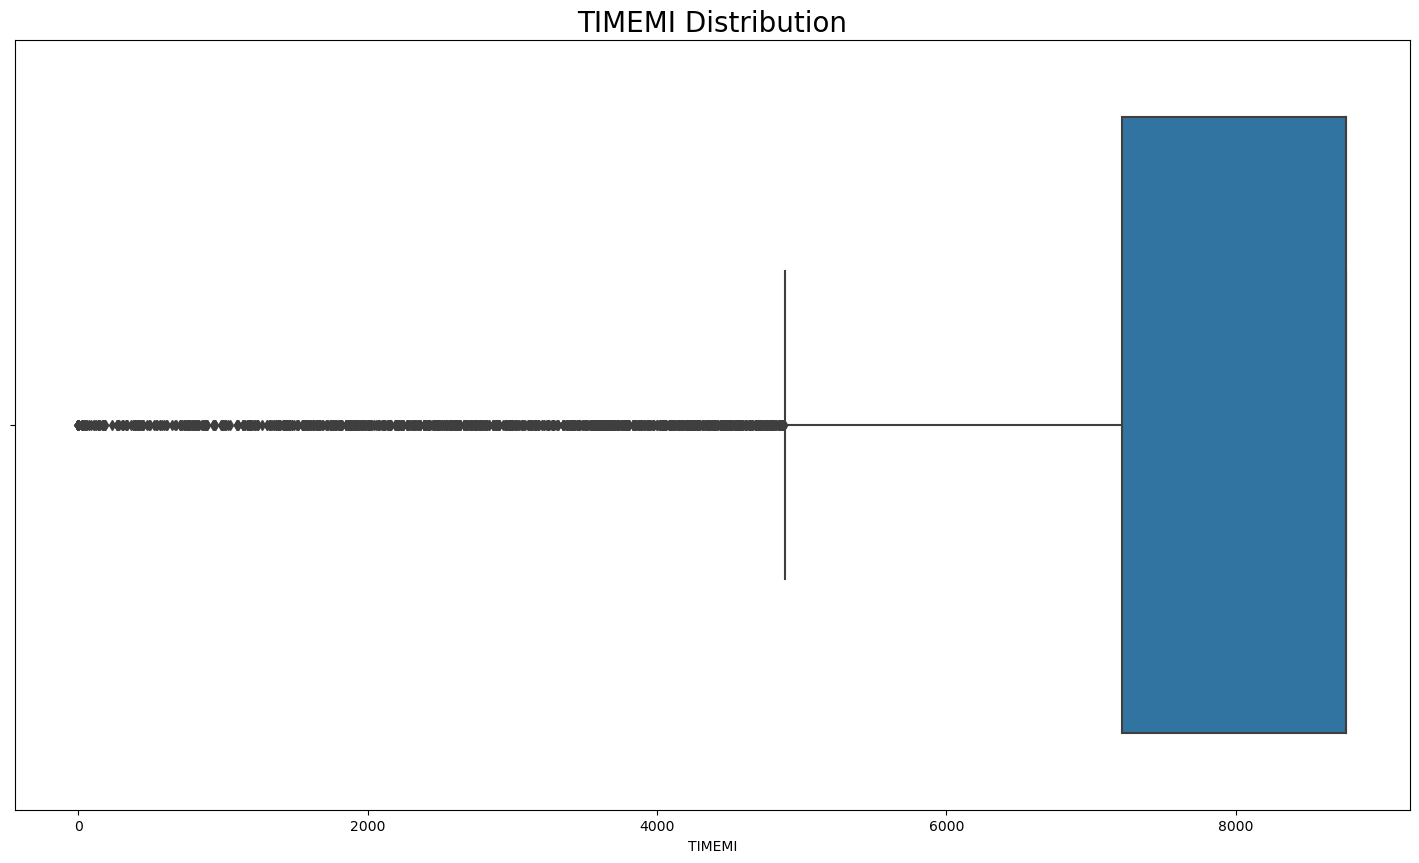

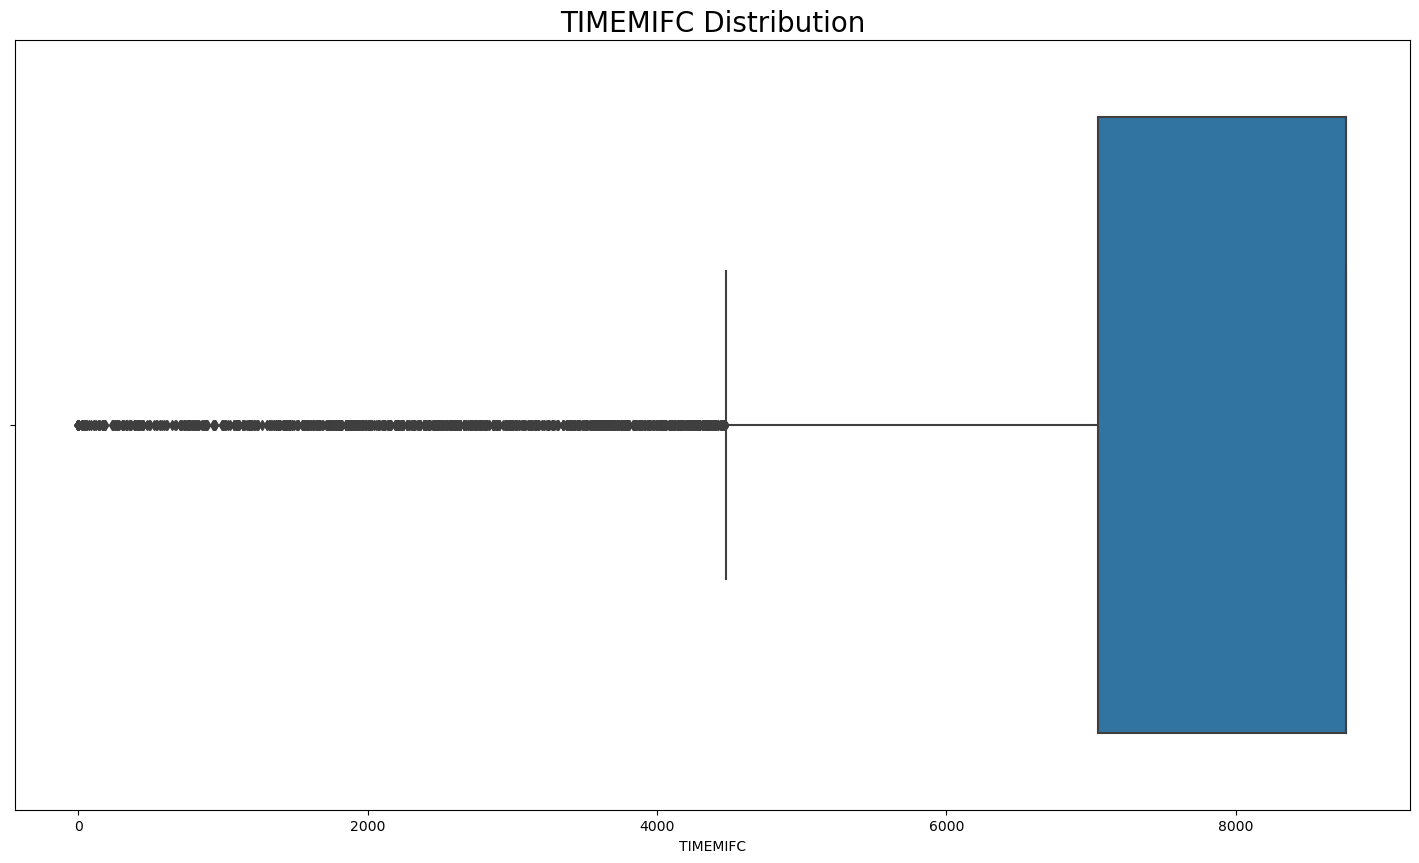

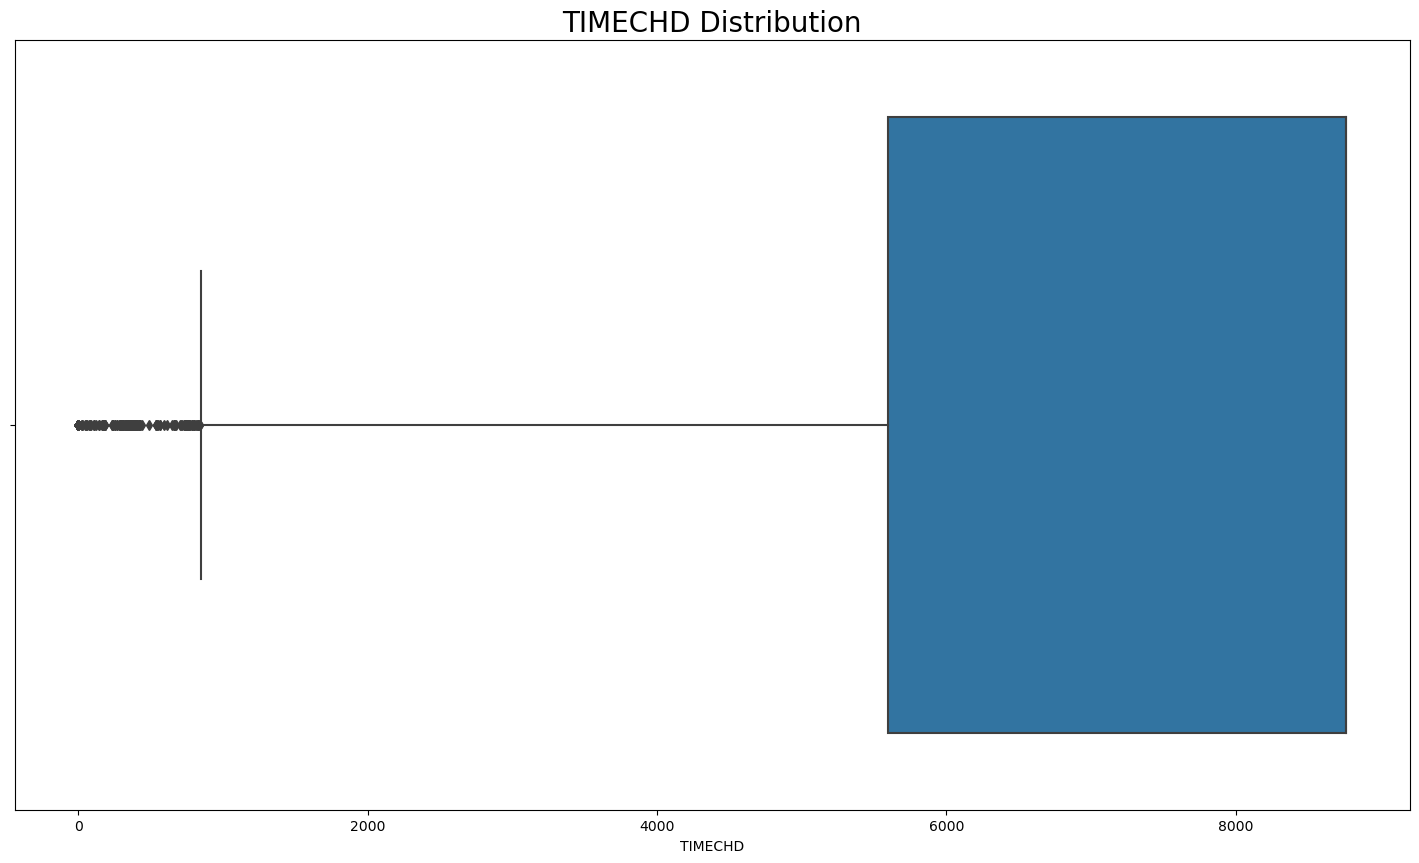

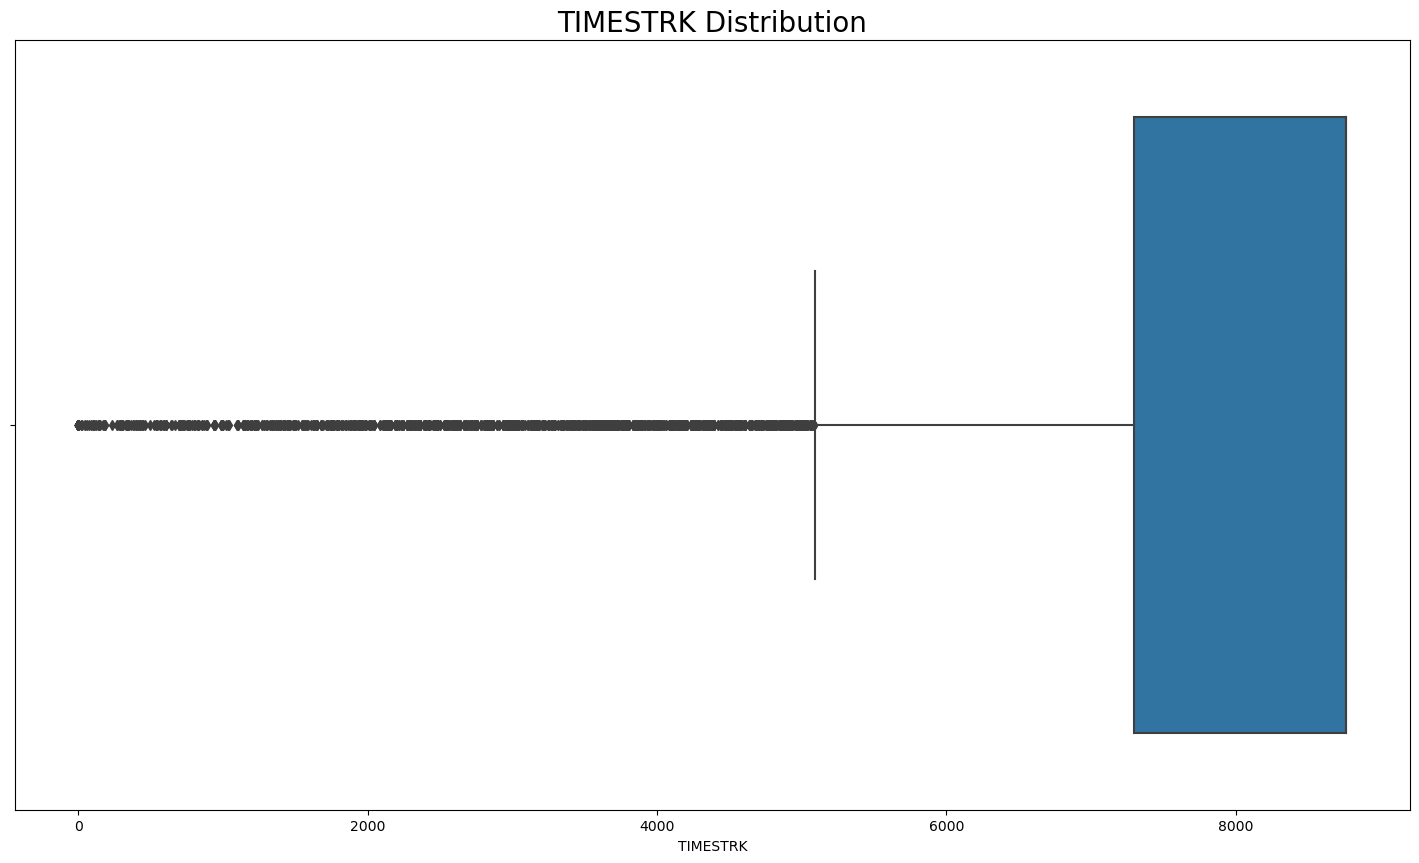

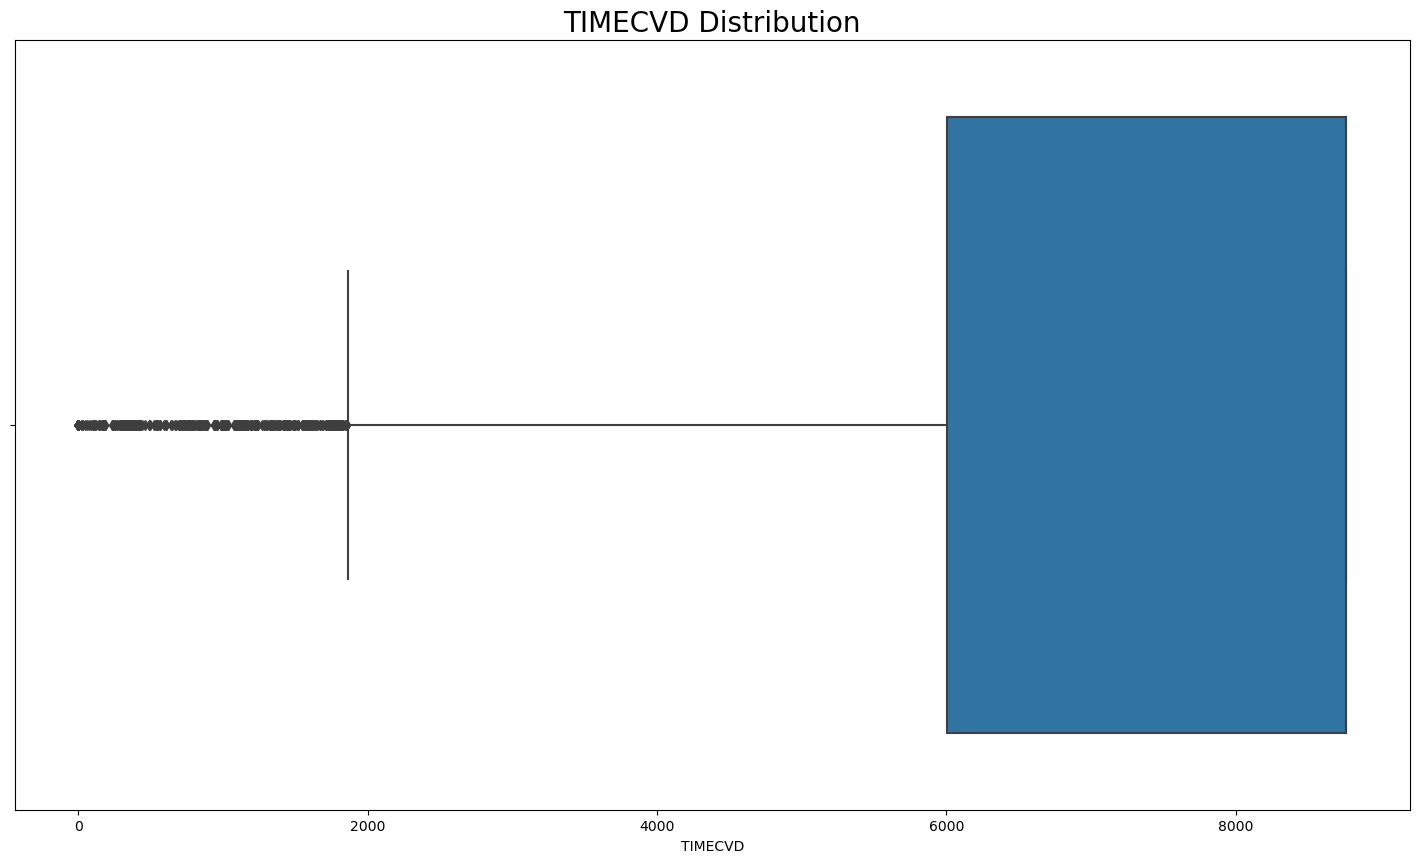

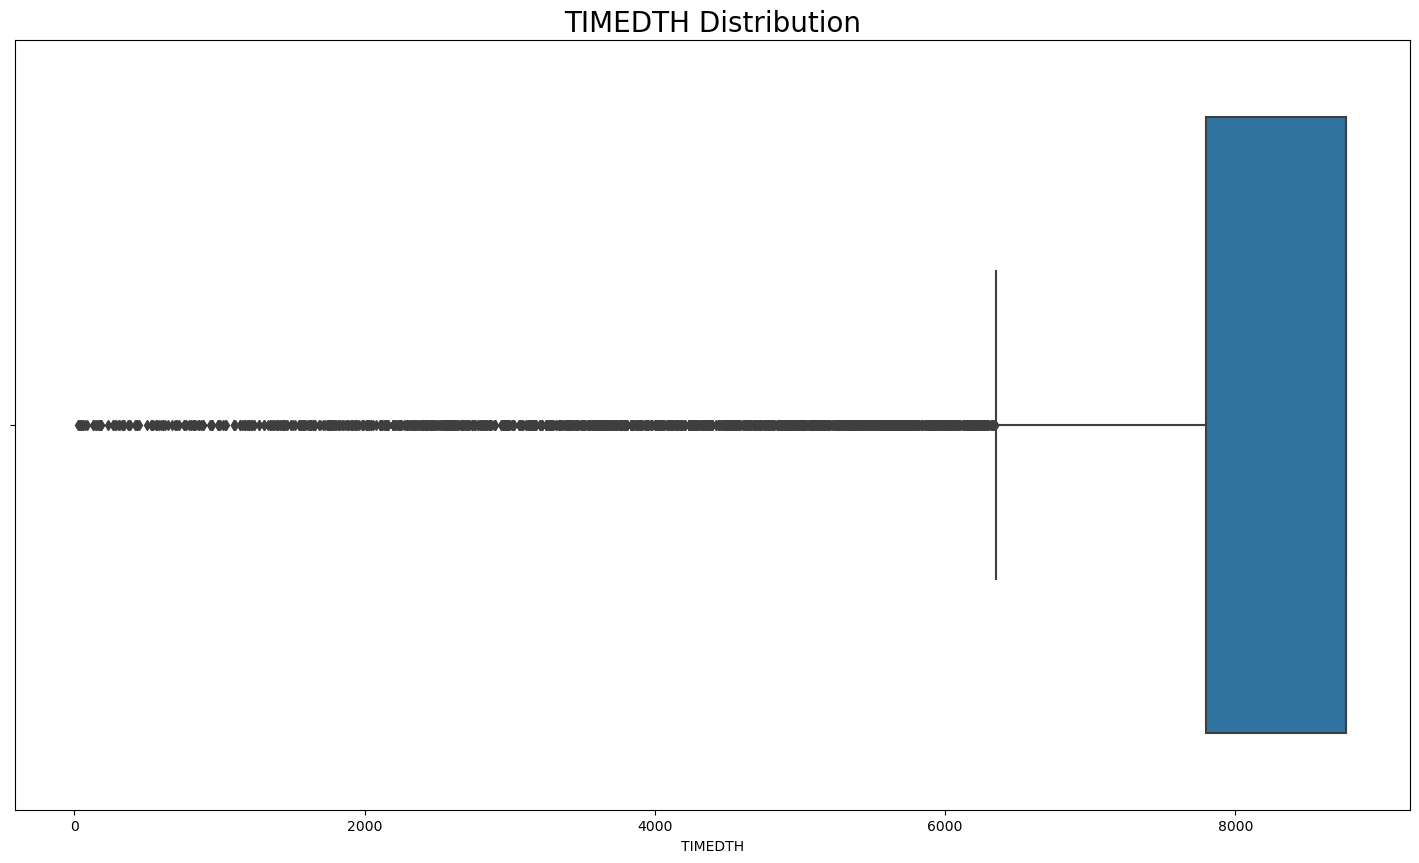

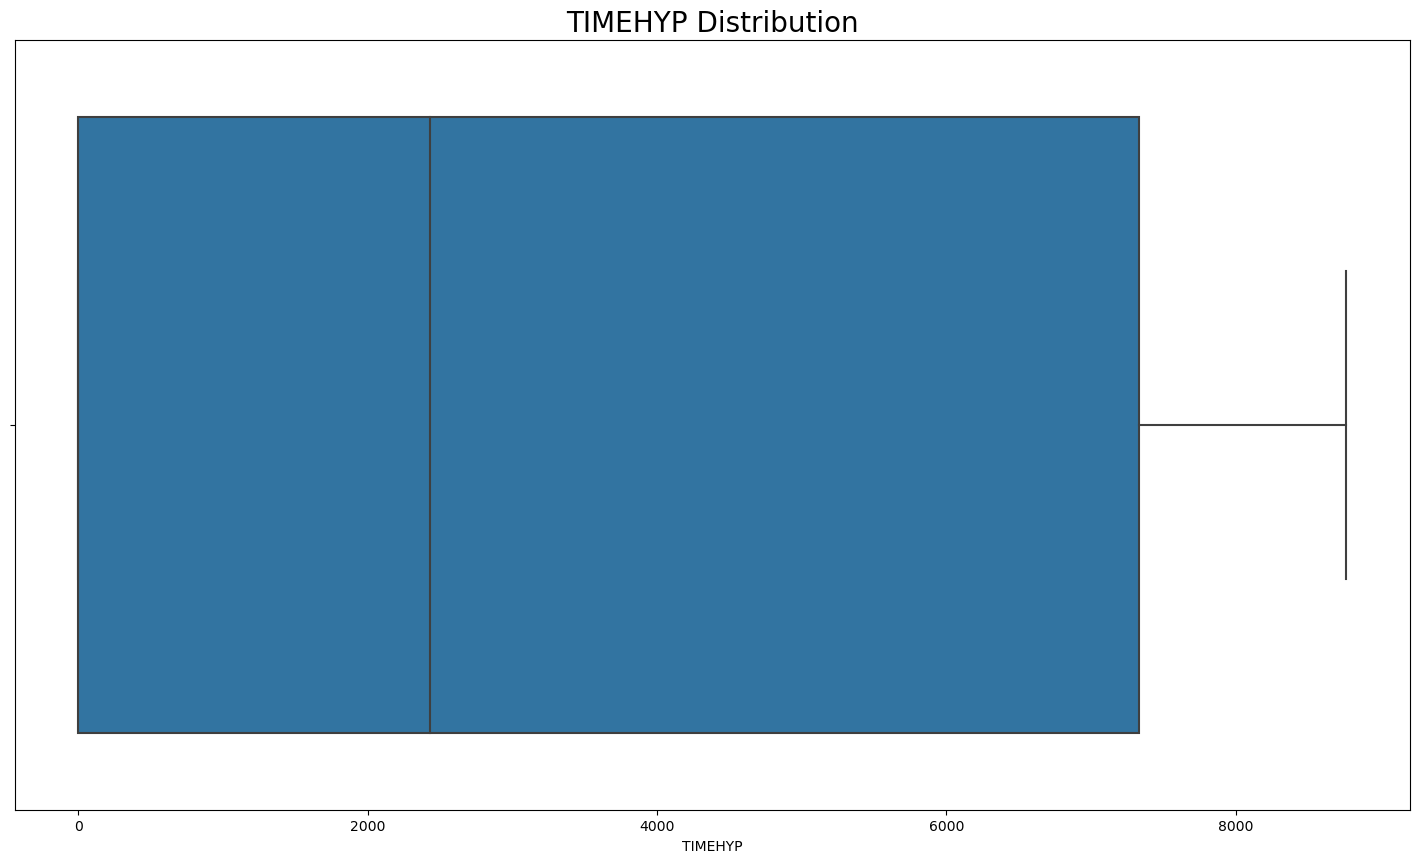

In [17]:
numeric_features = ['RANDID', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGS PER DAY', 'BMI', 'HEARTRATE', 'GLUCOSE', 'TIME', 'PERIOD', 'HDLC', 'LDLC', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.boxplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

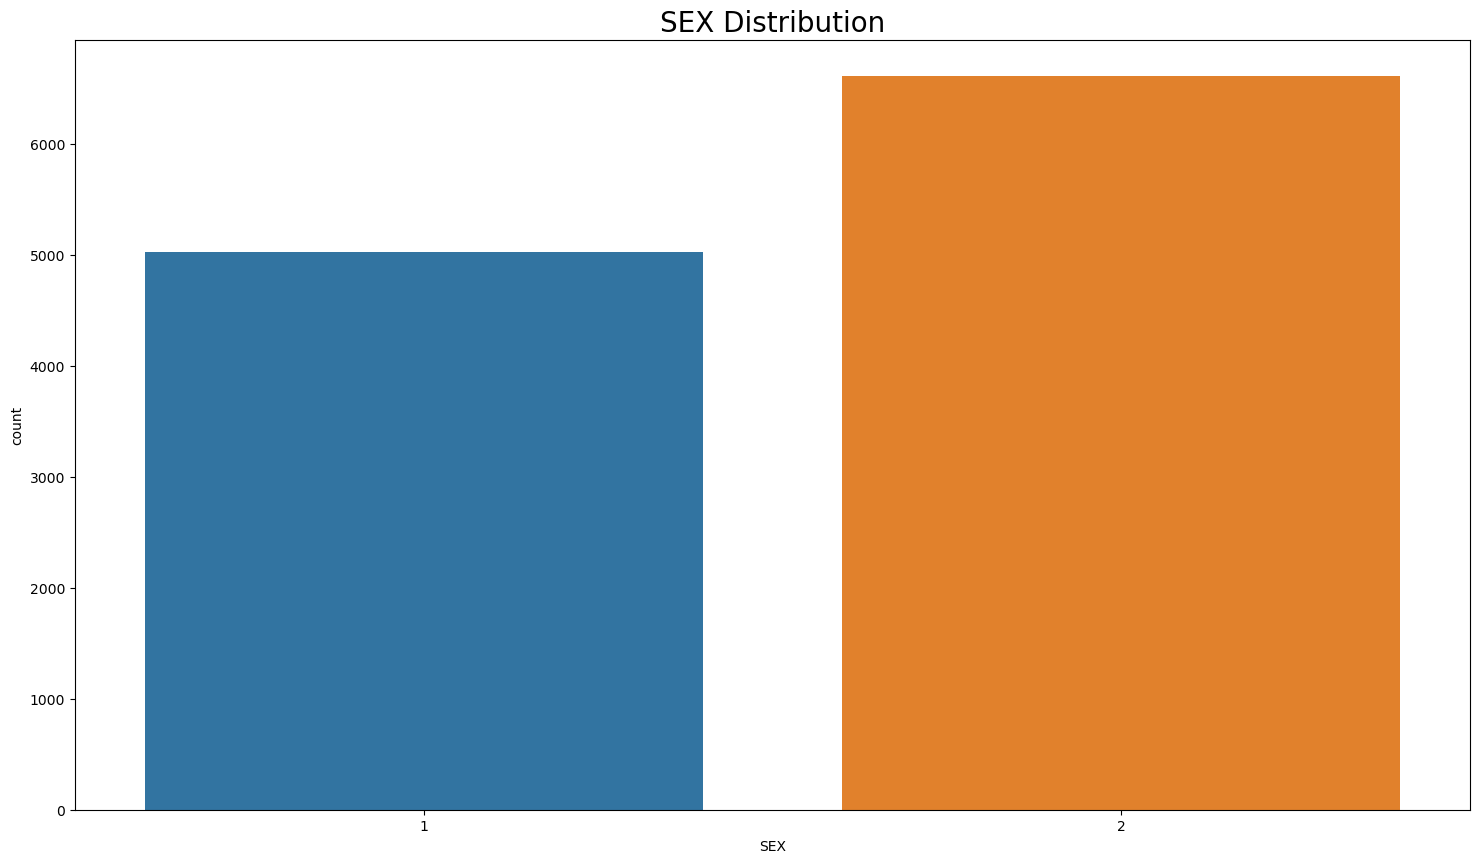

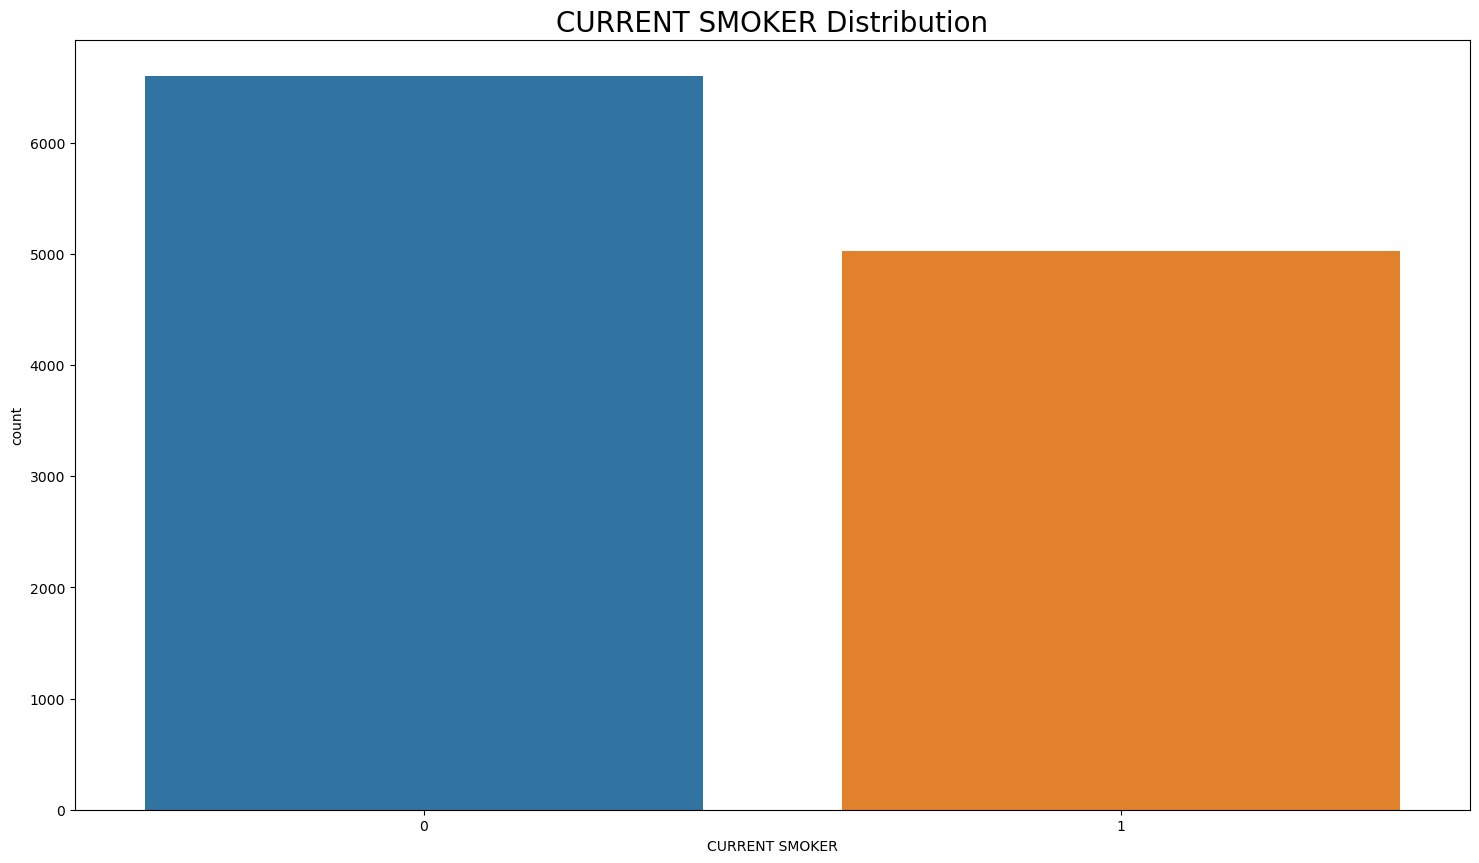

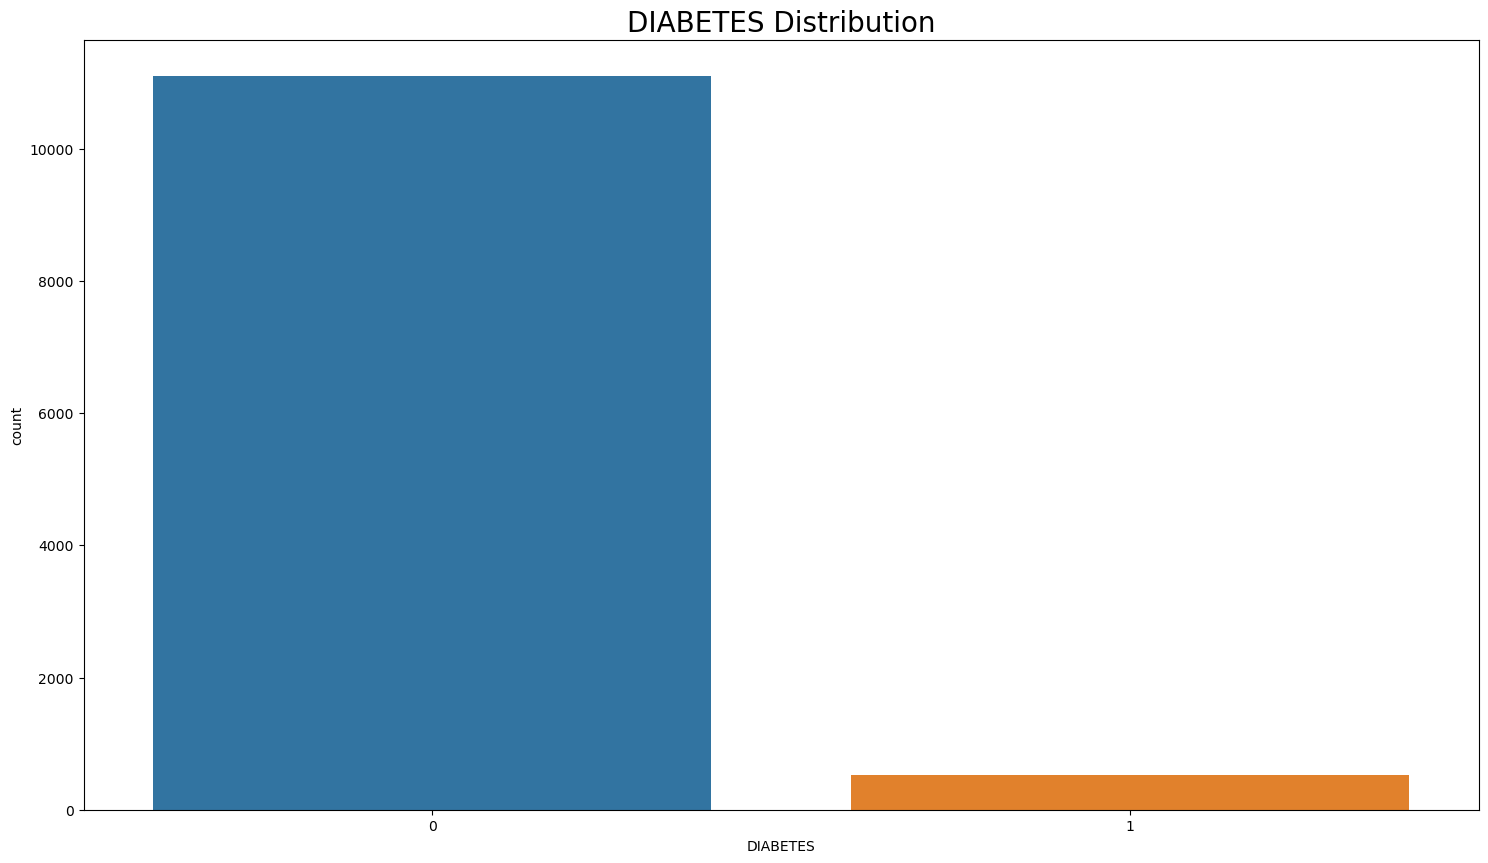

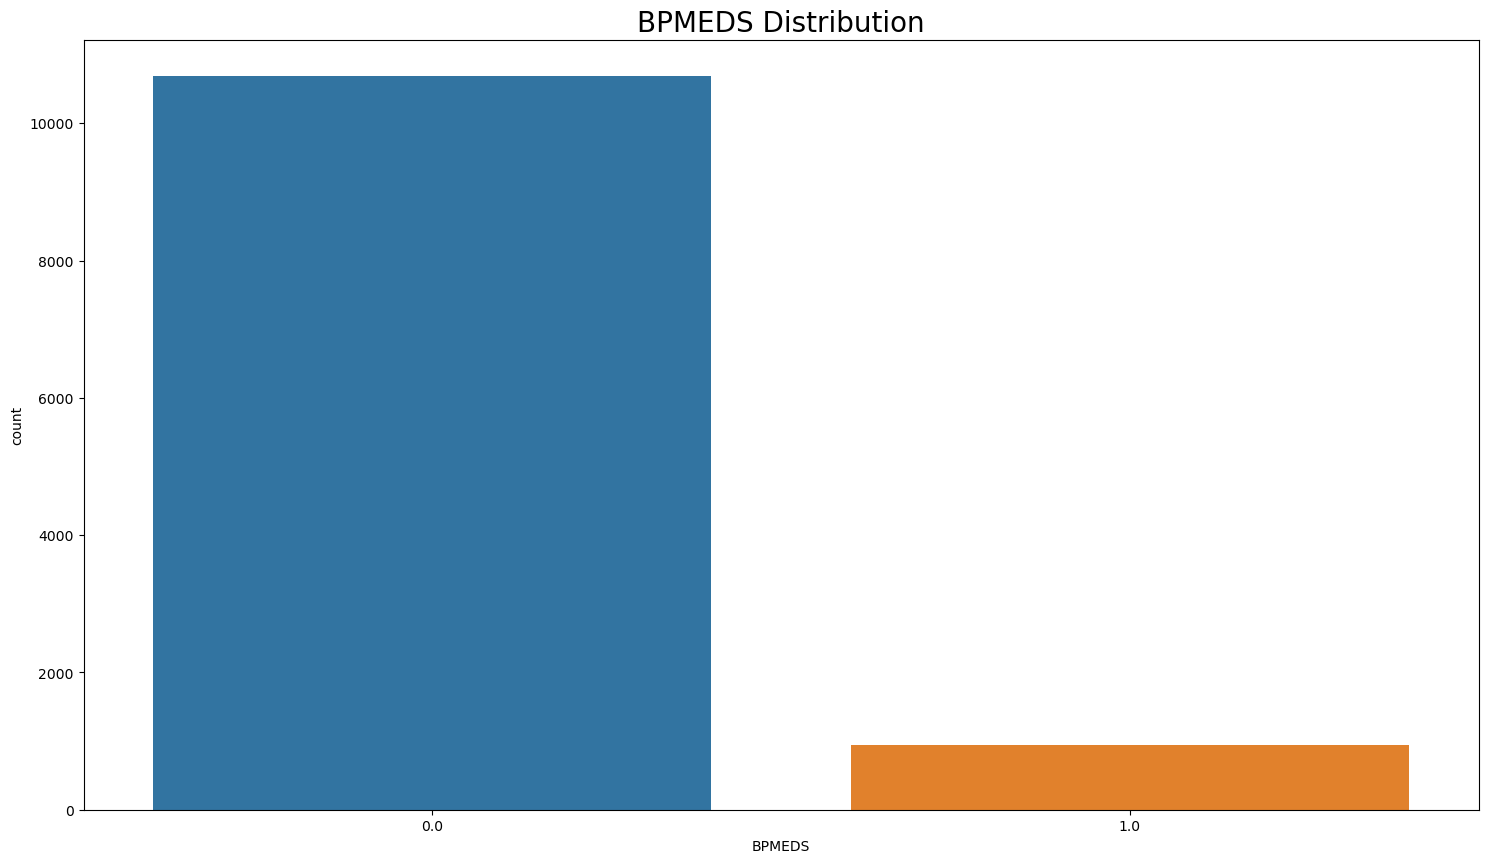

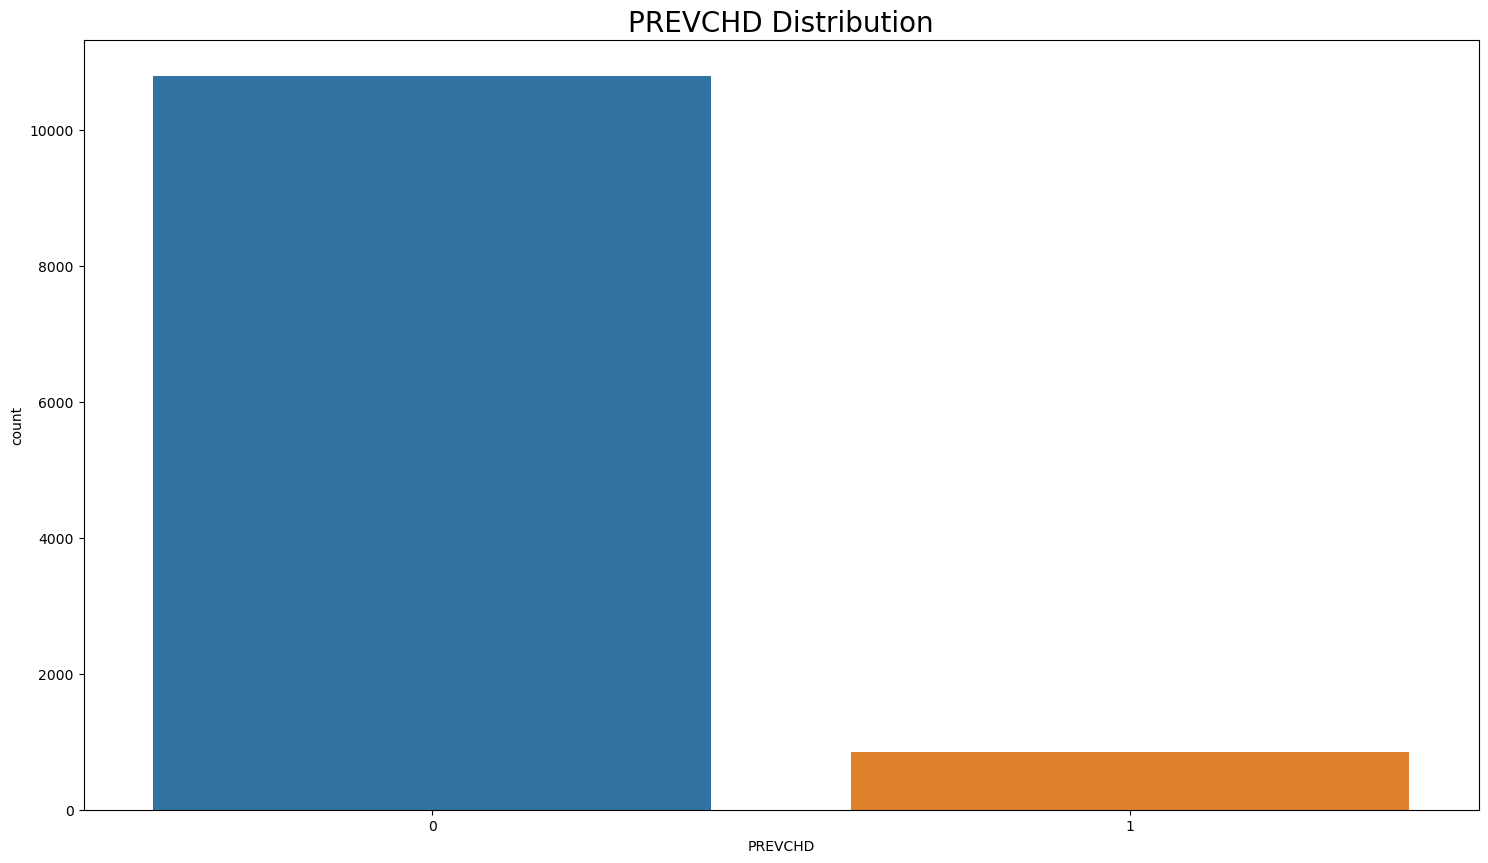

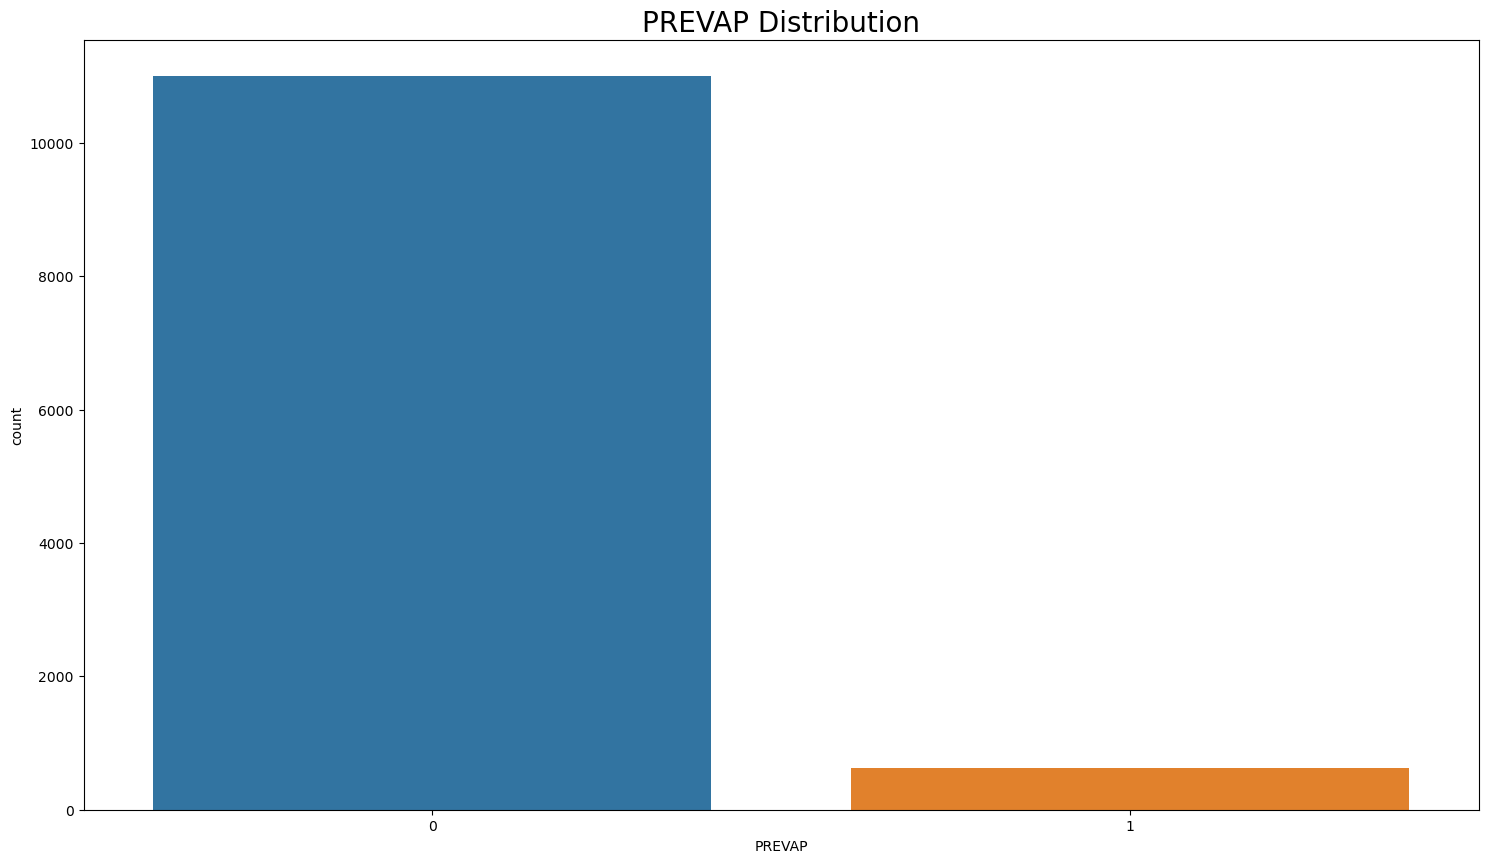

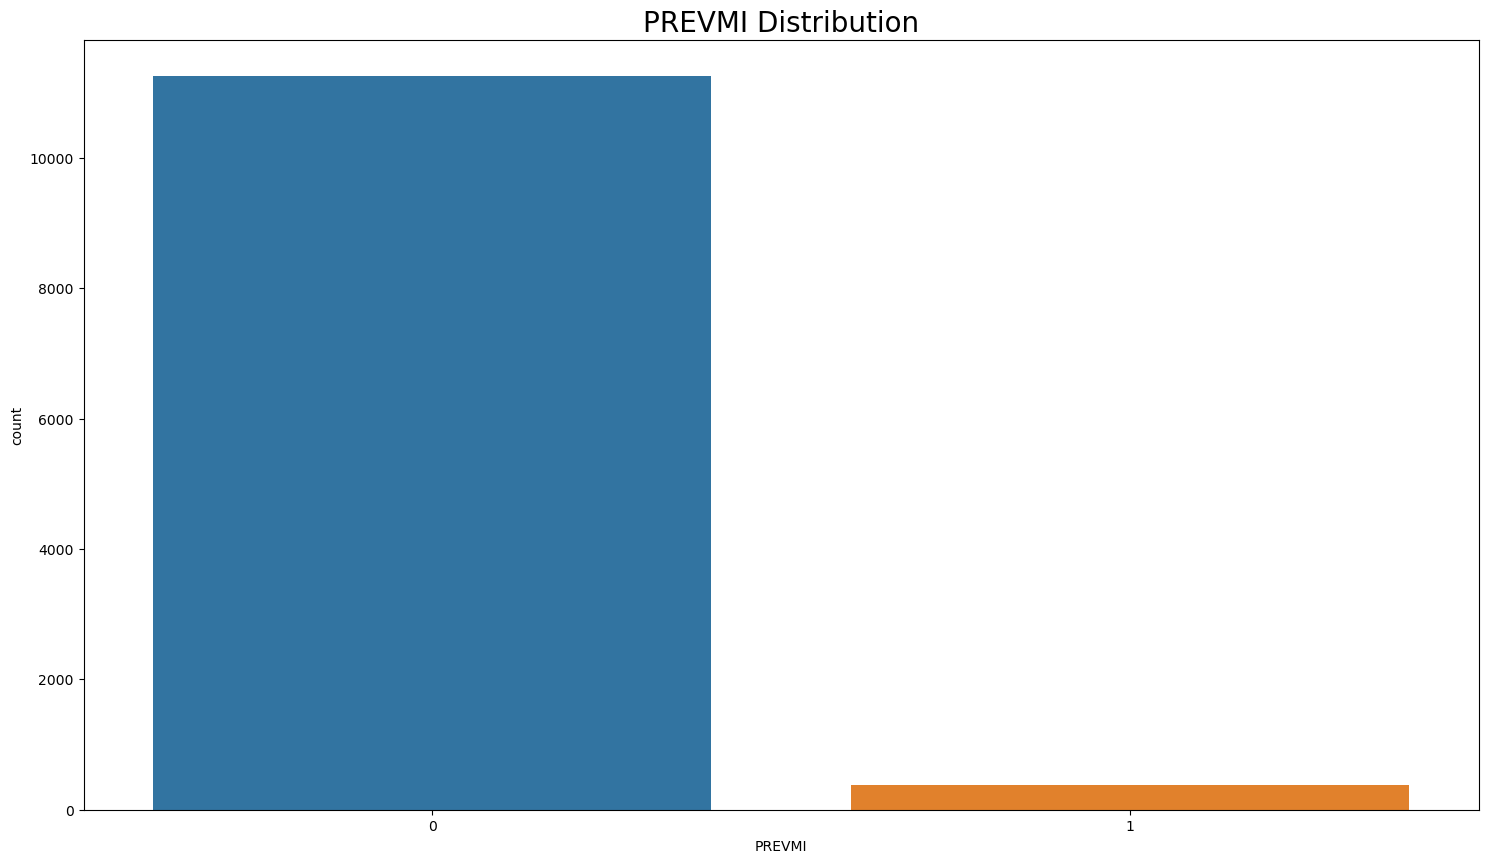

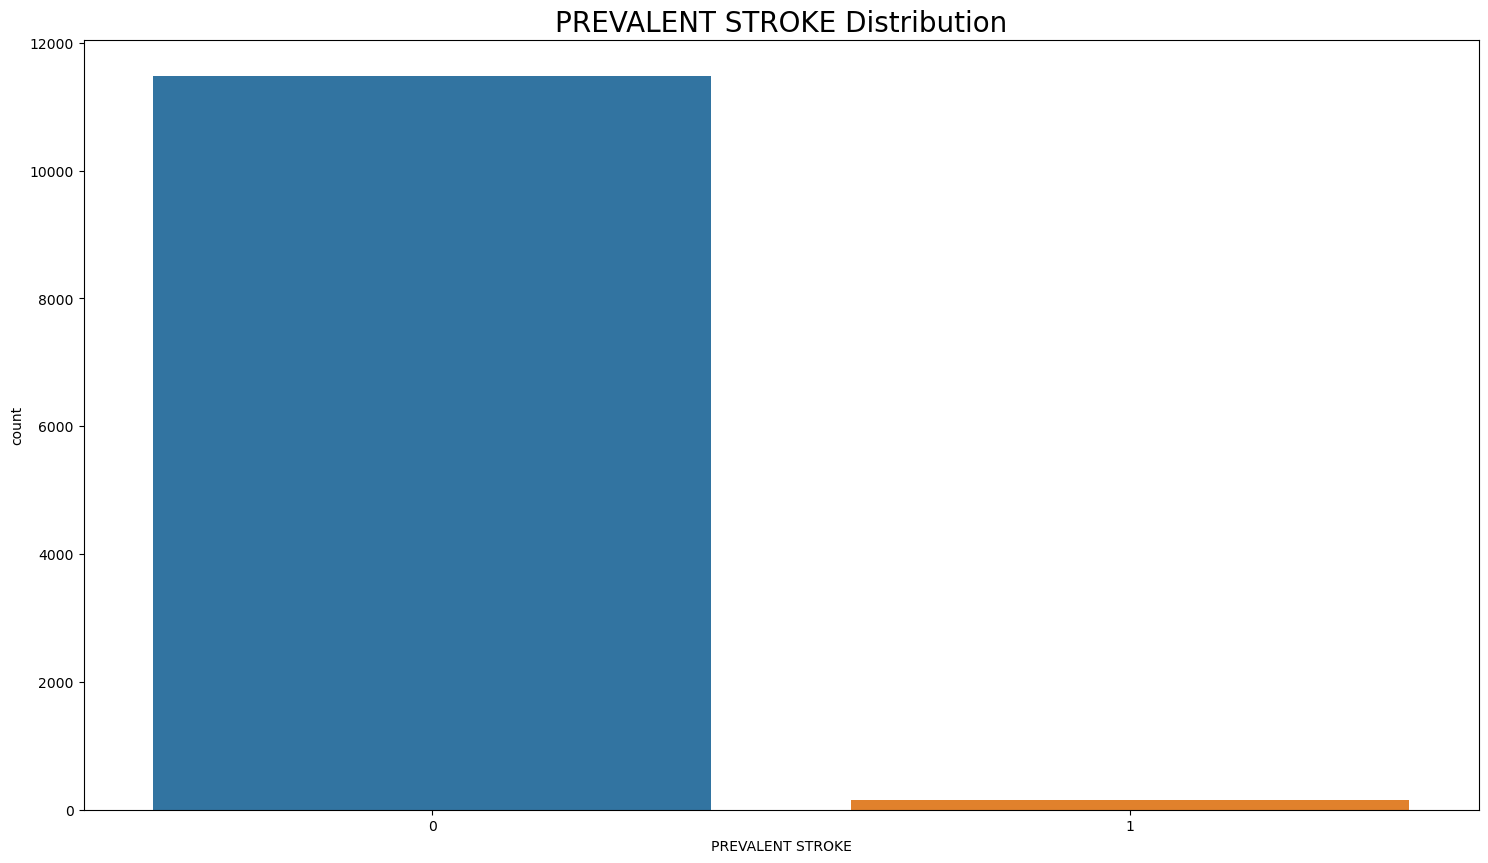

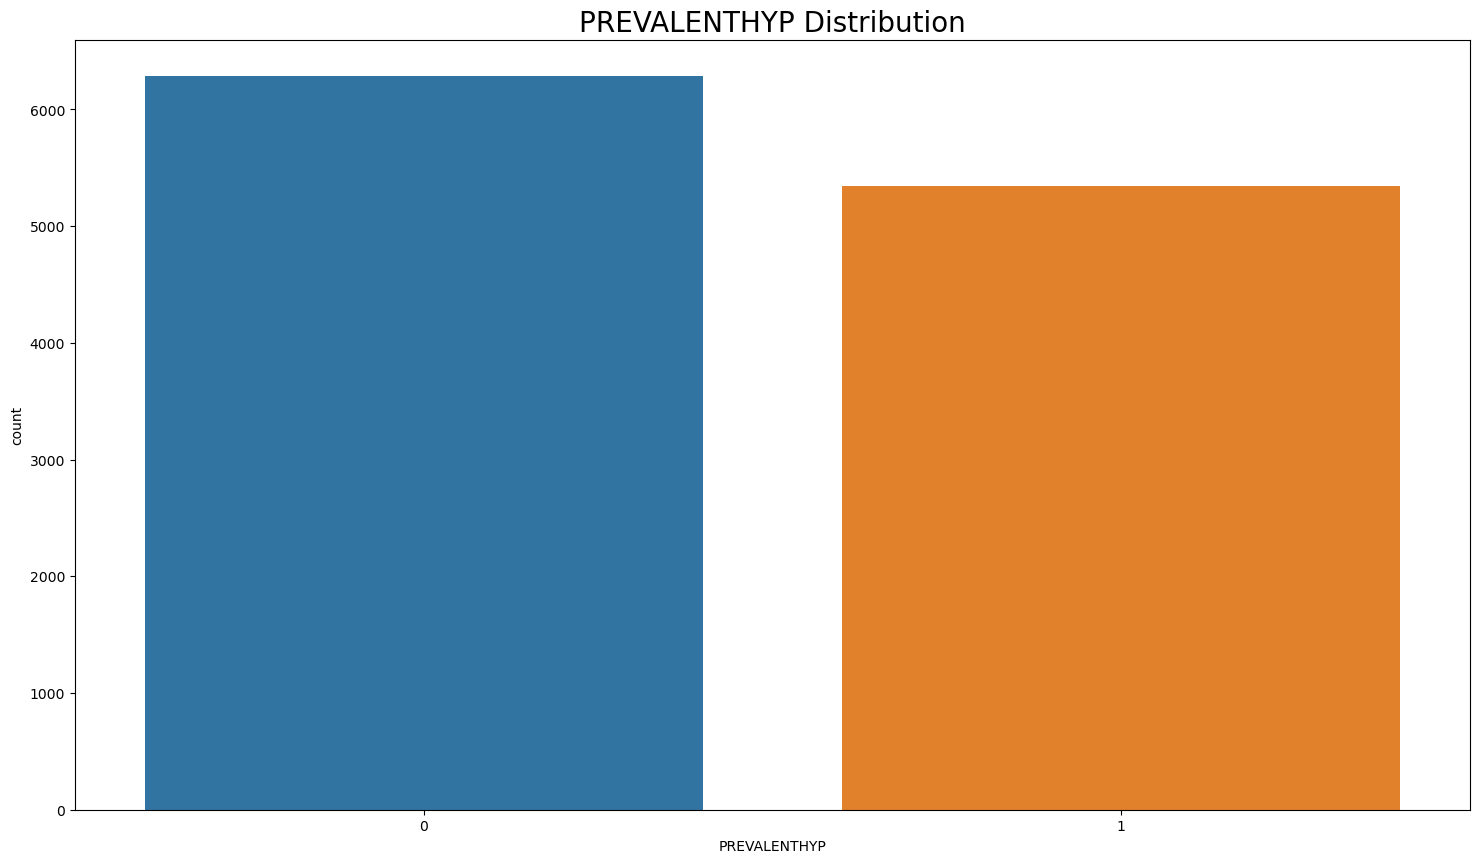

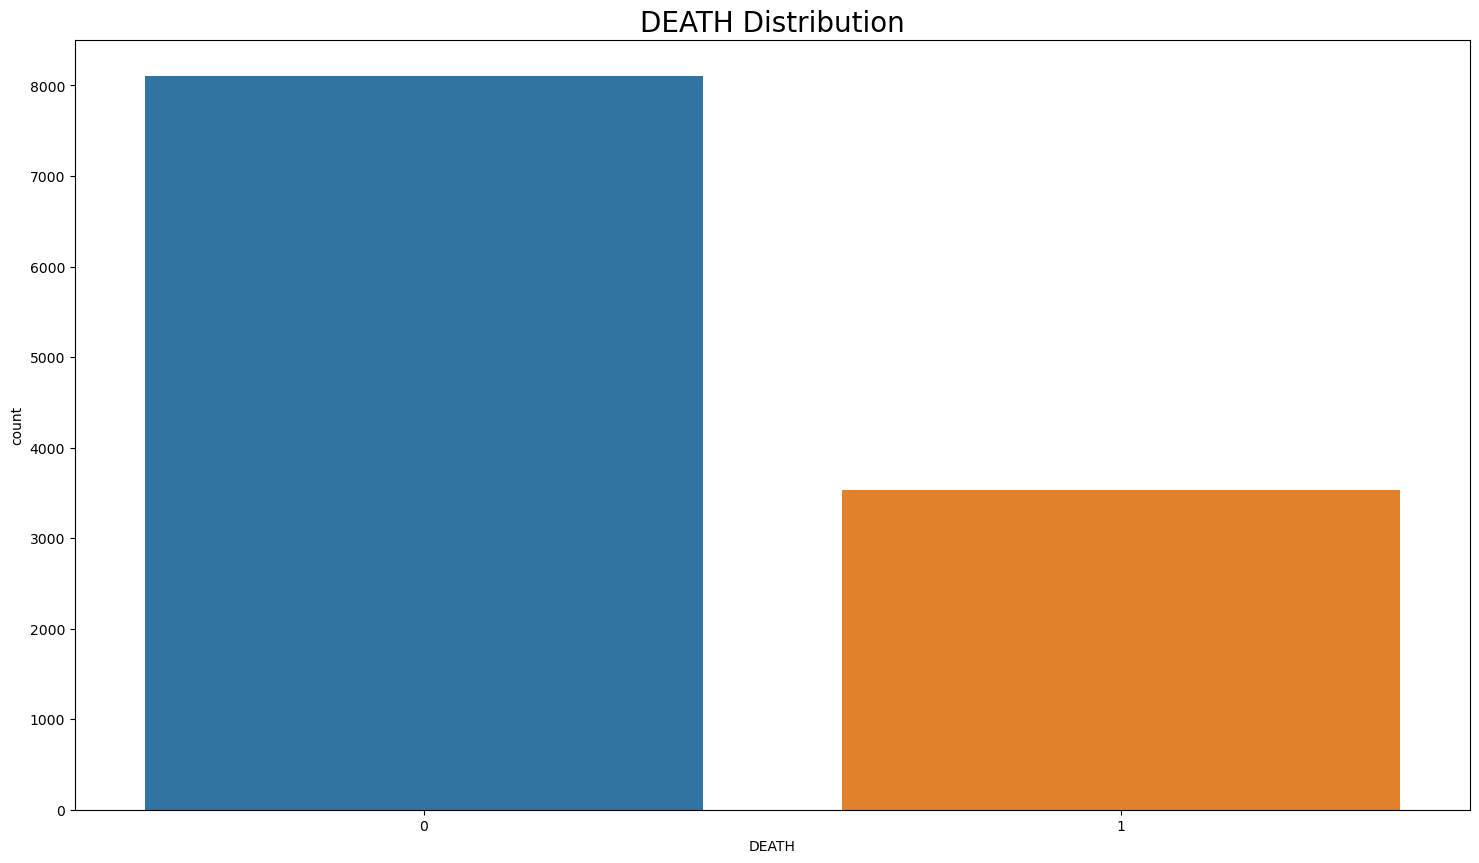

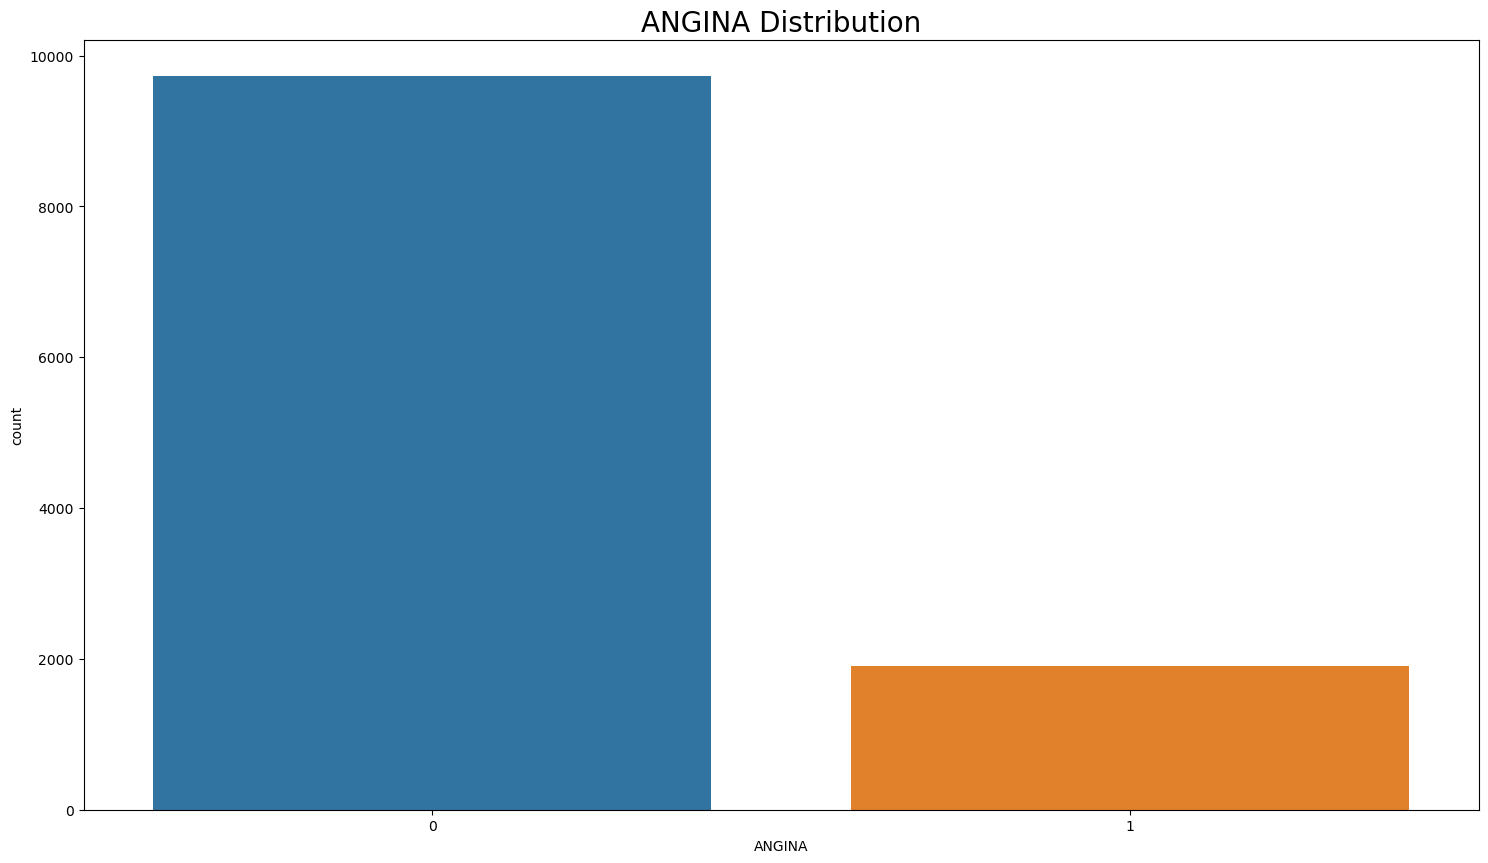

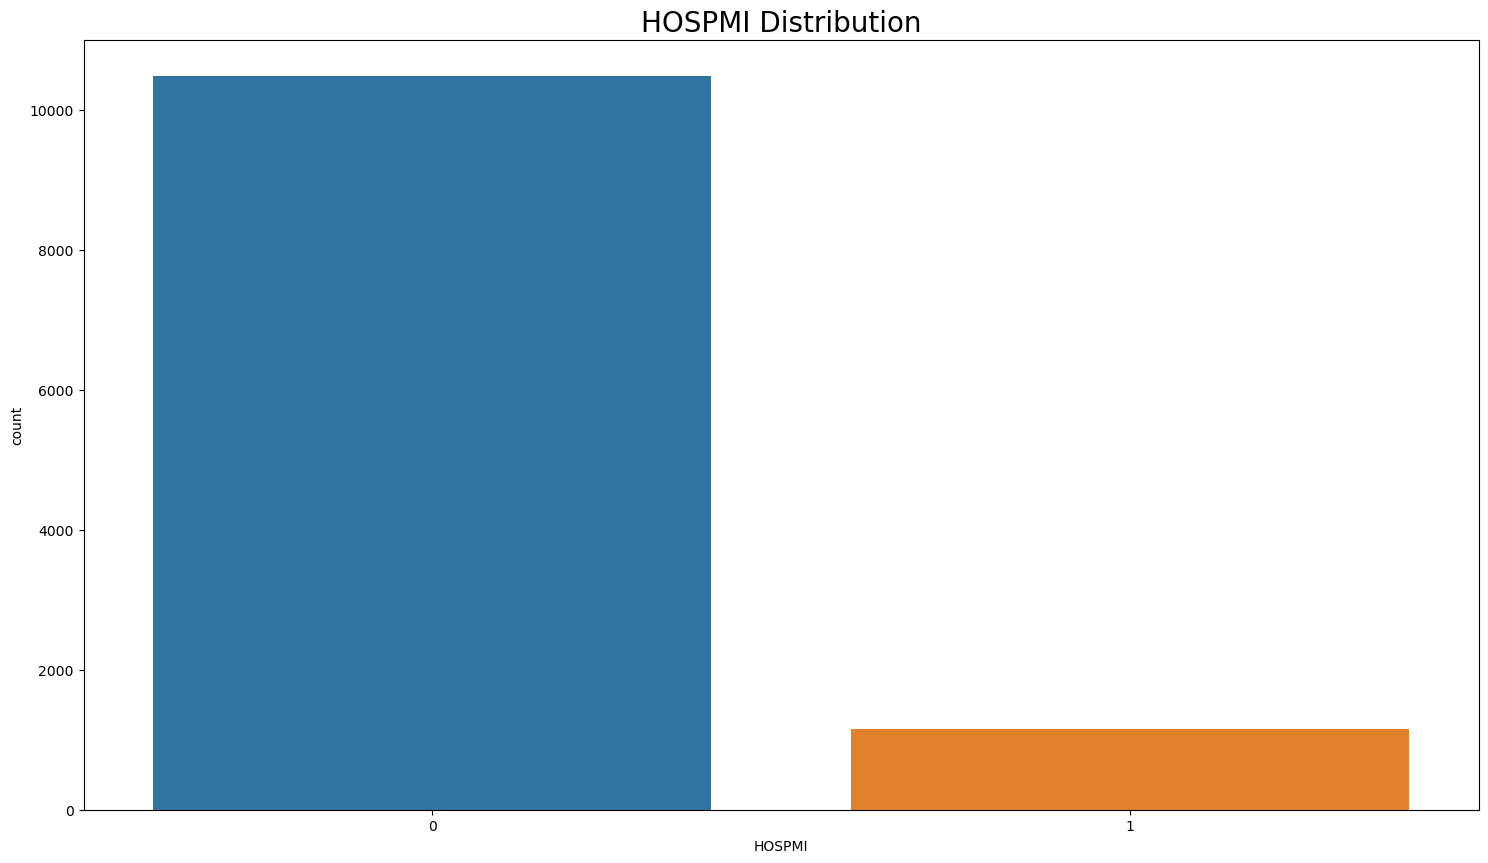

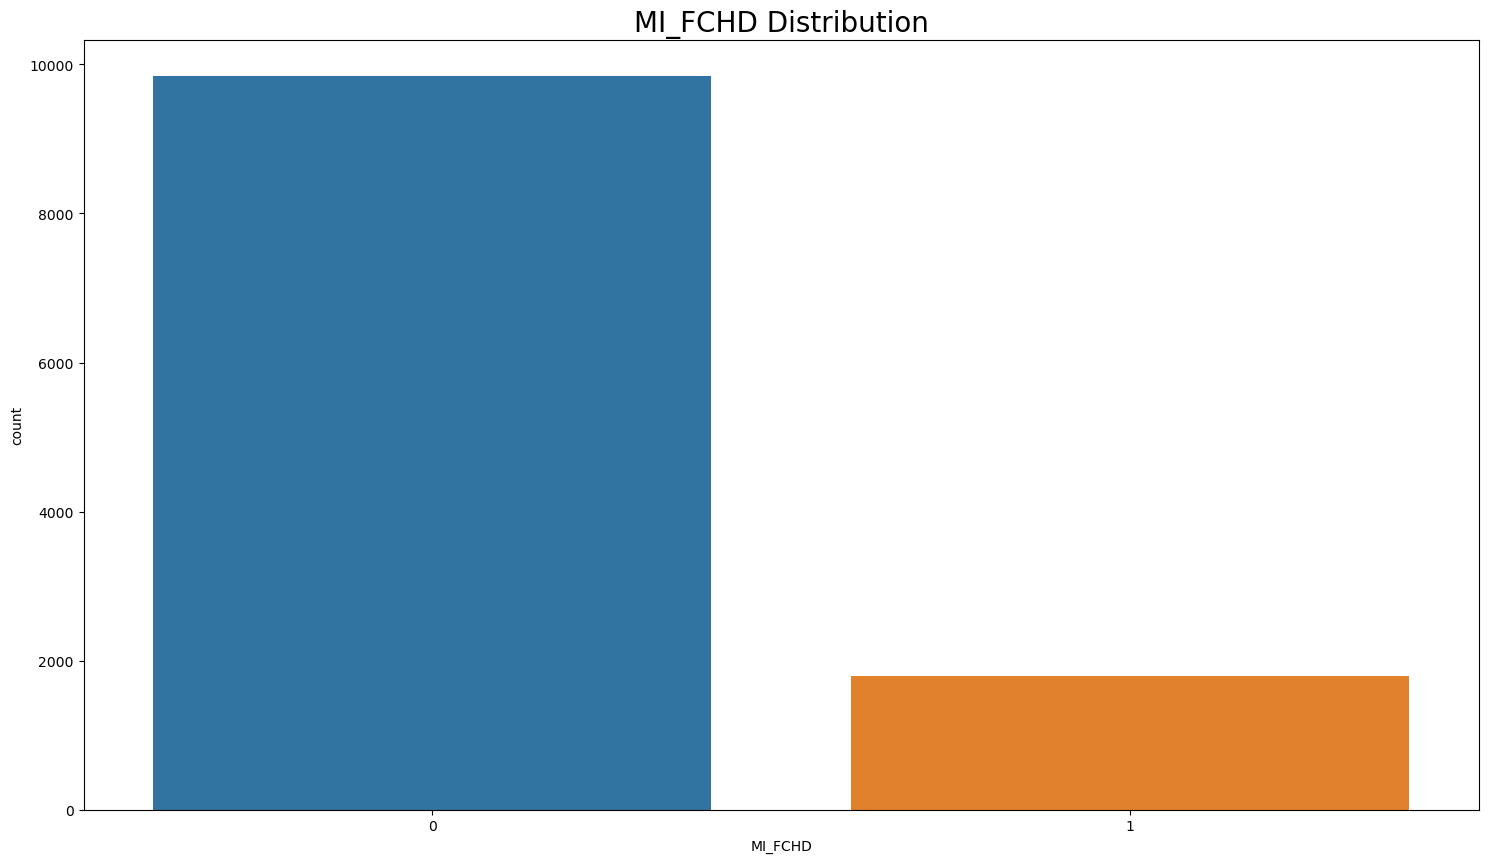

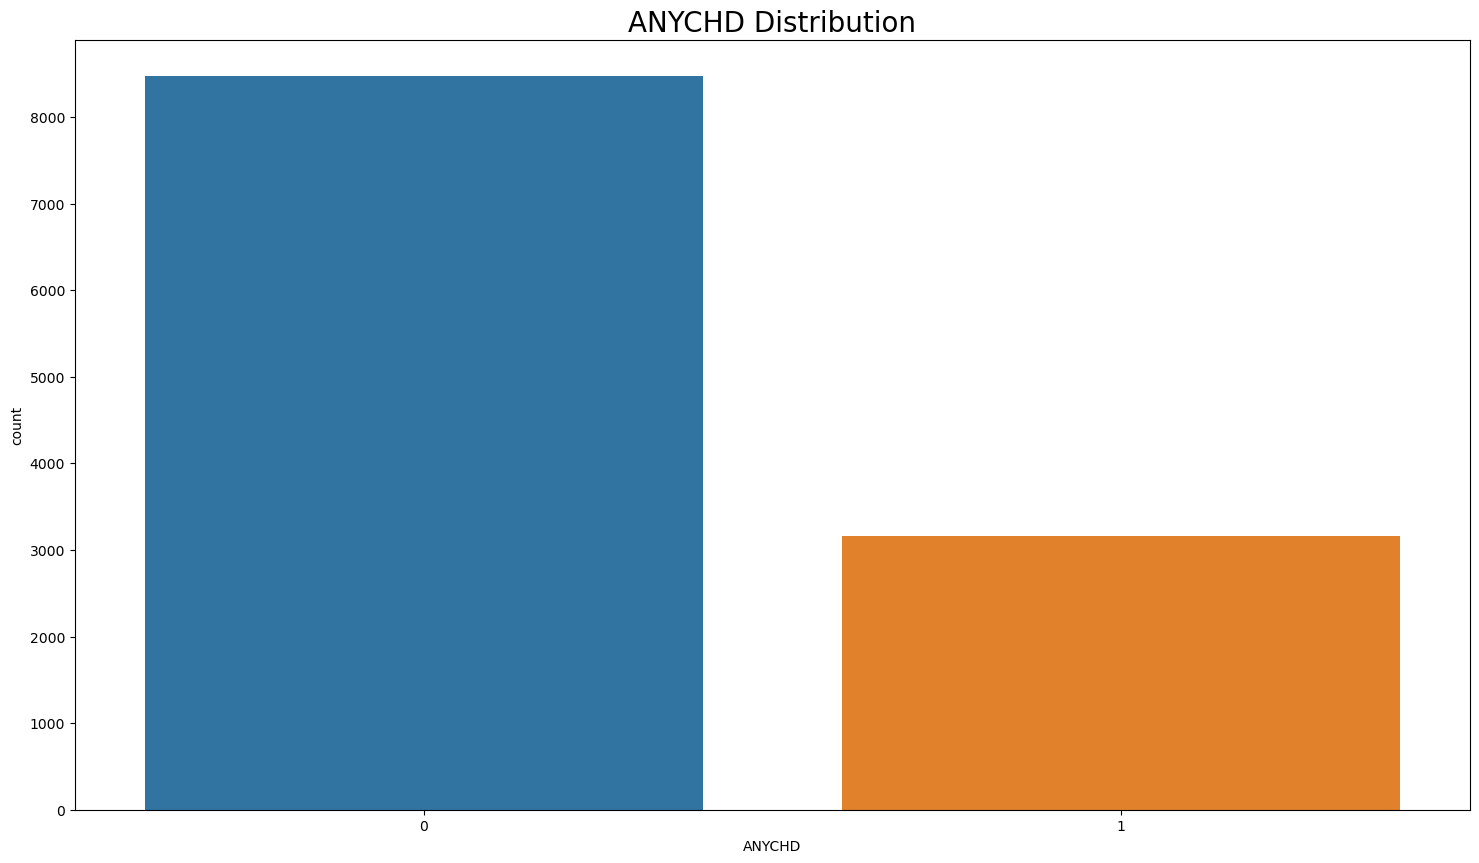

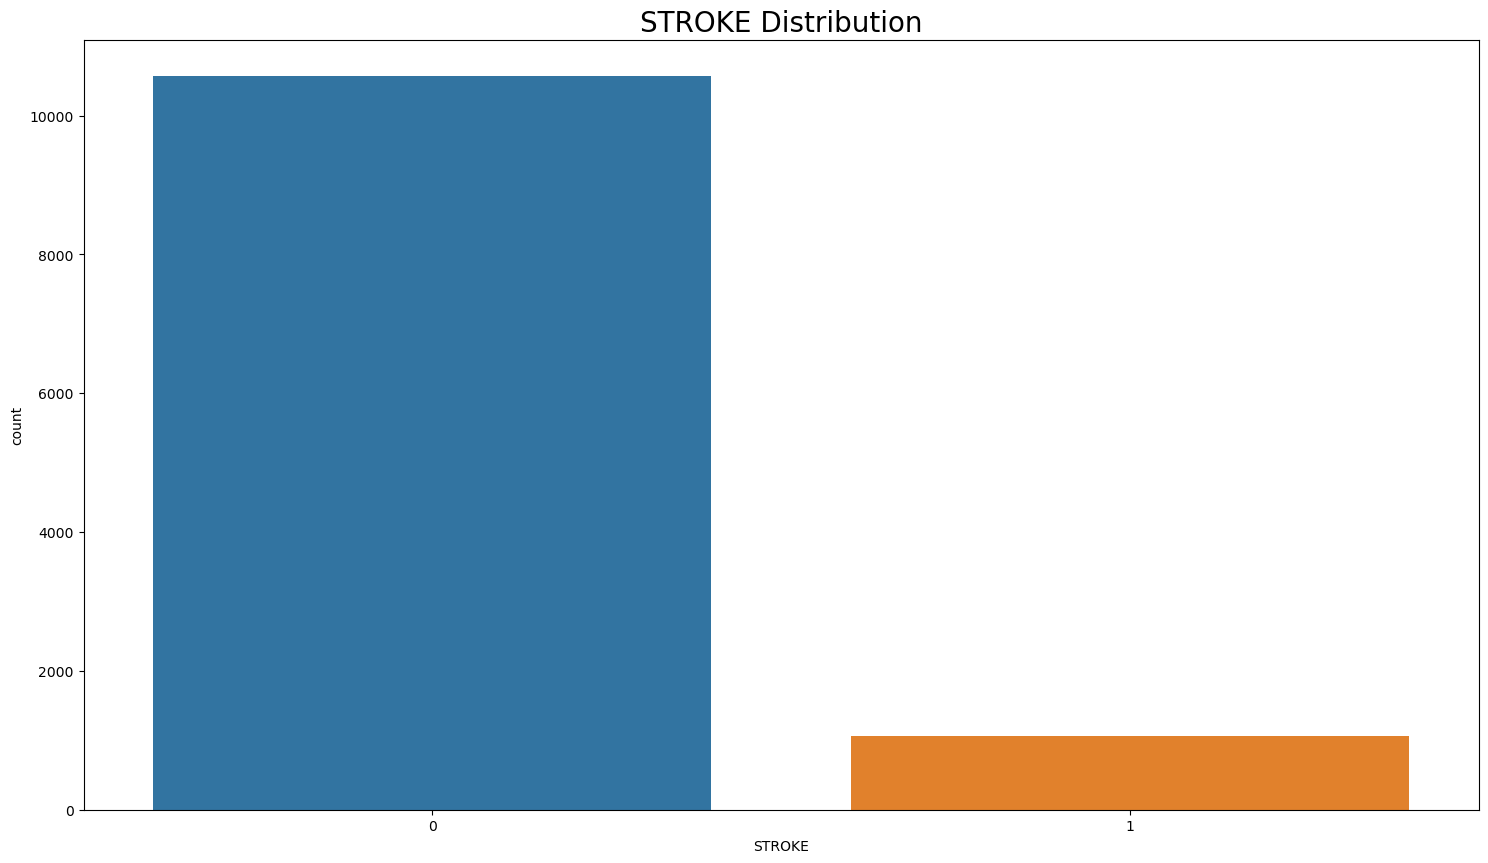

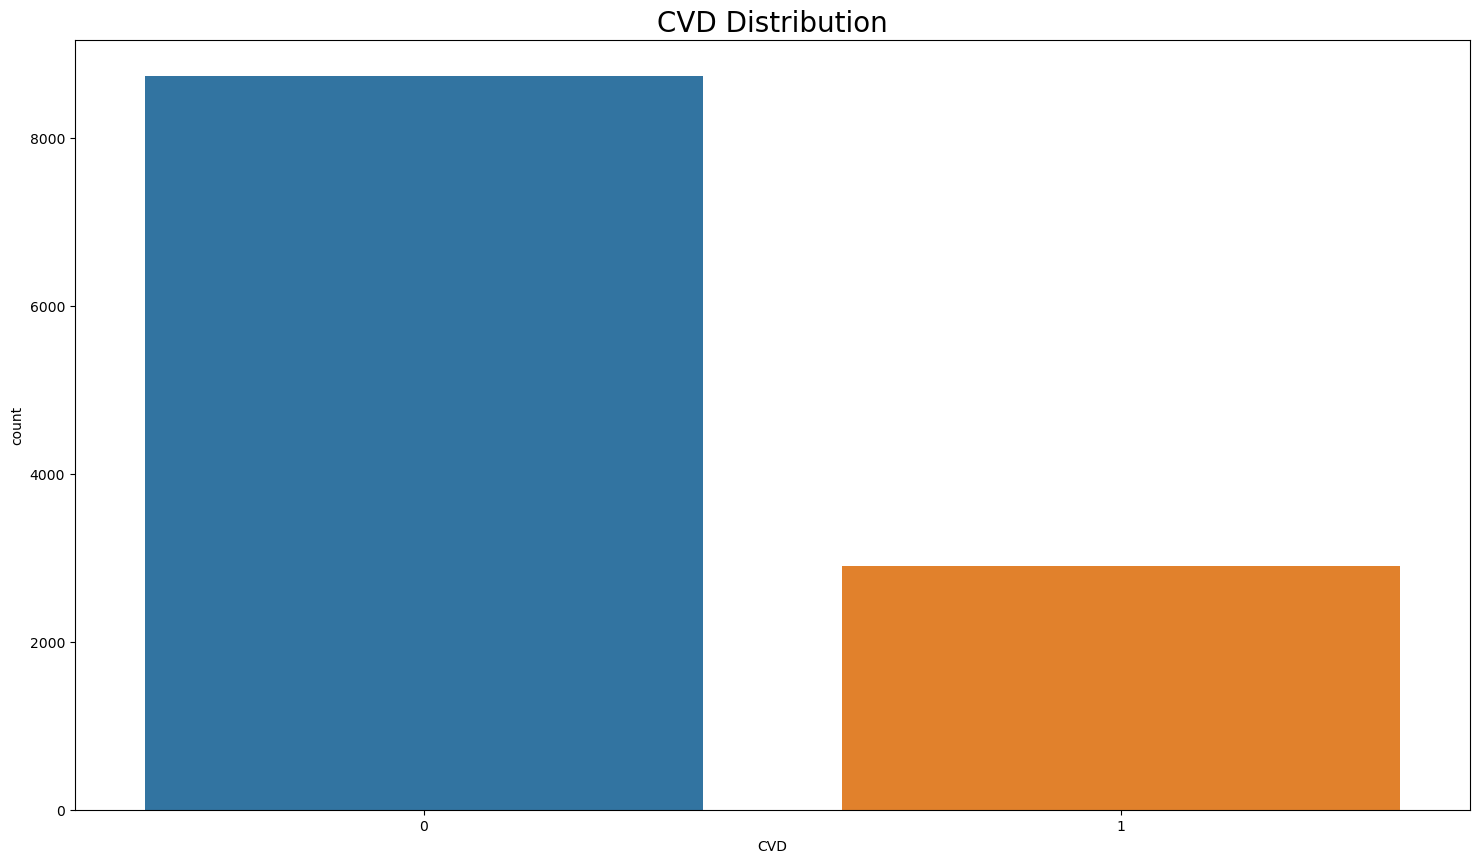

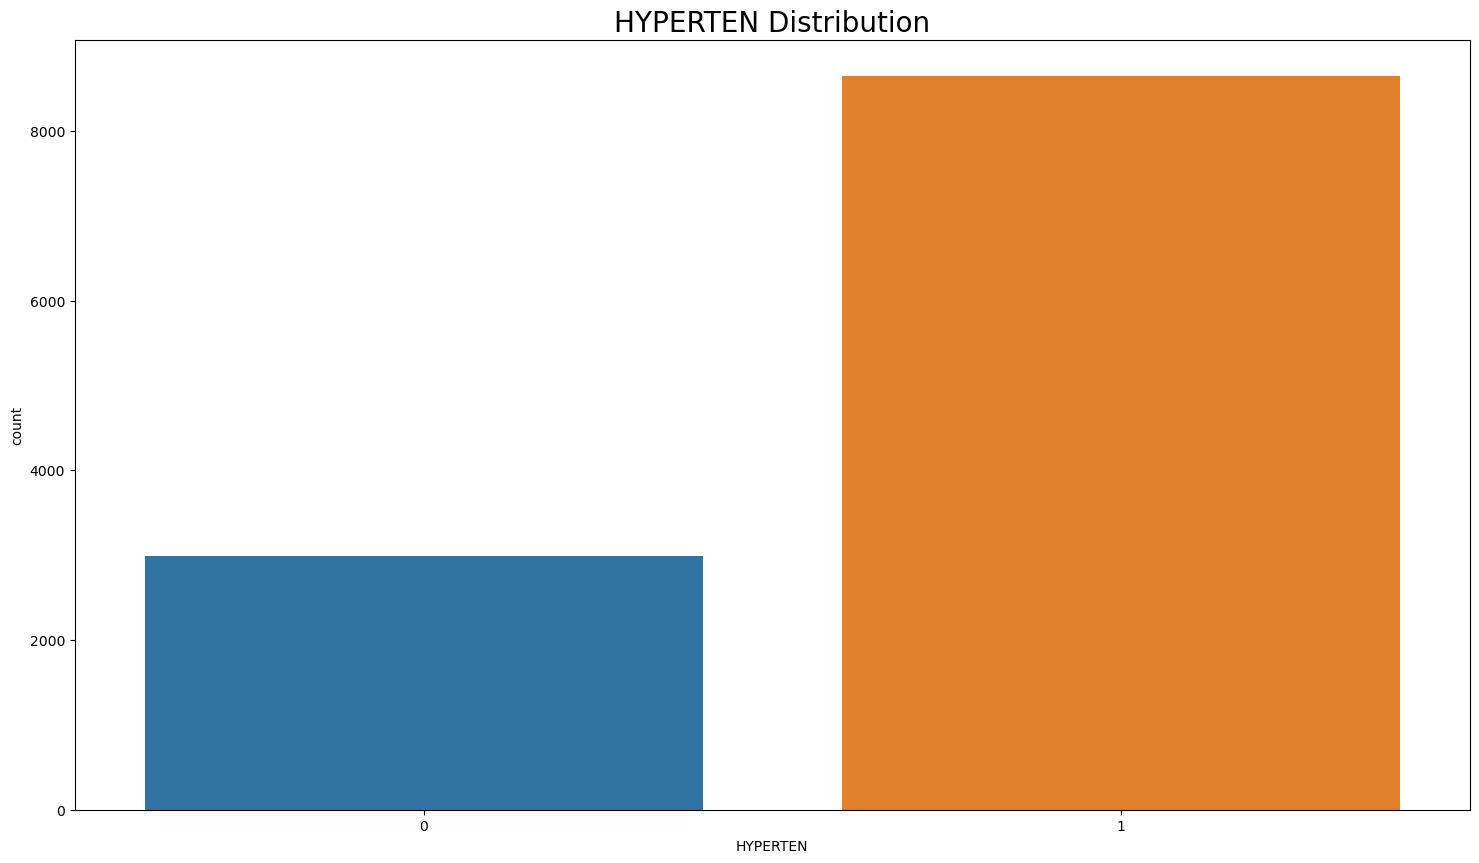

In [18]:
categorical_features = ['SEX', 'CURRENT SMOKER', 'DIABETES', 'BPMEDS', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVALENT STROKE', 'PREVALENTHYP', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN']
for feature in categorical_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.countplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

In [19]:
# Identify categorical columns. Assuming 'SEX' and 'educ' are categorical based on common sense or data dictionary
categorical_cols = ['SEX', 'EDUCATION']

# Apply one-hot encoding
df2 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows to verify the encoding
pd.set_option('display.max_columns', None)
df2.head()

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,CURRENT SMOKER,CIGS PER DAY,BMI,DIABETES,BPMEDS,HEARTRATE,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVALENT STROKE,PREVALENTHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,SEX_2,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0
0,2448,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,0,1,0.0,0.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766,False,False,False,False,True
1,2448,209.0,52,121.0,66.0,0,0.0,0.00,0,0.0,69.0,92.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766,False,False,False,False,True
2,6238,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0,1,0.0,0.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False
3,6238,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,0,0,0,0,0,2156,2,0.0,0.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False
4,6238,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False


In [20]:
# Separate features (X) and target (y)
X = df2.drop('ANYCHD', axis=1)
y = df2['ANYCHD']

# Import and instantiate RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Print the shape of original and oversampled datasets
print("Original dataset shape:", X.shape, y.shape)
print("Oversampled dataset shape:", X_resampled.shape, y_resampled.shape)

Original dataset shape: (11627, 41) (11627,)
Oversampled dataset shape: (16938, 41) (16938,)


In [21]:
X.head()

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,CURRENT SMOKER,CIGS PER DAY,BMI,DIABETES,BPMEDS,HEARTRATE,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVALENT STROKE,PREVALENTHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,SEX_2,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0
0,2448,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,0,1,0.0,0.0,0,0,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766,False,False,False,False,True
1,2448,209.0,52,121.0,66.0,0,0.0,0.00,0,0.0,69.0,92.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766,False,False,False,False,True
2,6238,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0,1,0.0,0.0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False
3,6238,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,0,0,0,0,0,2156,2,0.0,0.0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False
4,6238,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False


In [22]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: ANYCHD, dtype: int64

In [23]:
# SelectKBest with chi2 to calculate scores for all features
selector_all = SelectKBest(chi2, k='all')
selector_all.fit(X_resampled, y_resampled)

# Get the scores and feature names
feature_scores = pd.DataFrame({'Feature': X_resampled.columns, 'Score': selector_all.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Feature Importance Scores (Chi-squared) for all features:")
display(feature_scores)

Feature Importance Scores (Chi-squared) for all features:


,Feature,Score
0,RANDID,1.931932e+07
31,TIMECHD,1.046563e+07
28,TIMEAP,5.981004e+06
33,TIMECVD,5.000898e+06
35,TIMEHYP,4.026602e+06
30,TIMEMIFC,2.152731e+06
29,TIMEMI,1.719754e+06
32,TIMESTRK,5.225501e+05
34,TIMEDTH,3.842094e+05
17,TIME,1.044183e+04


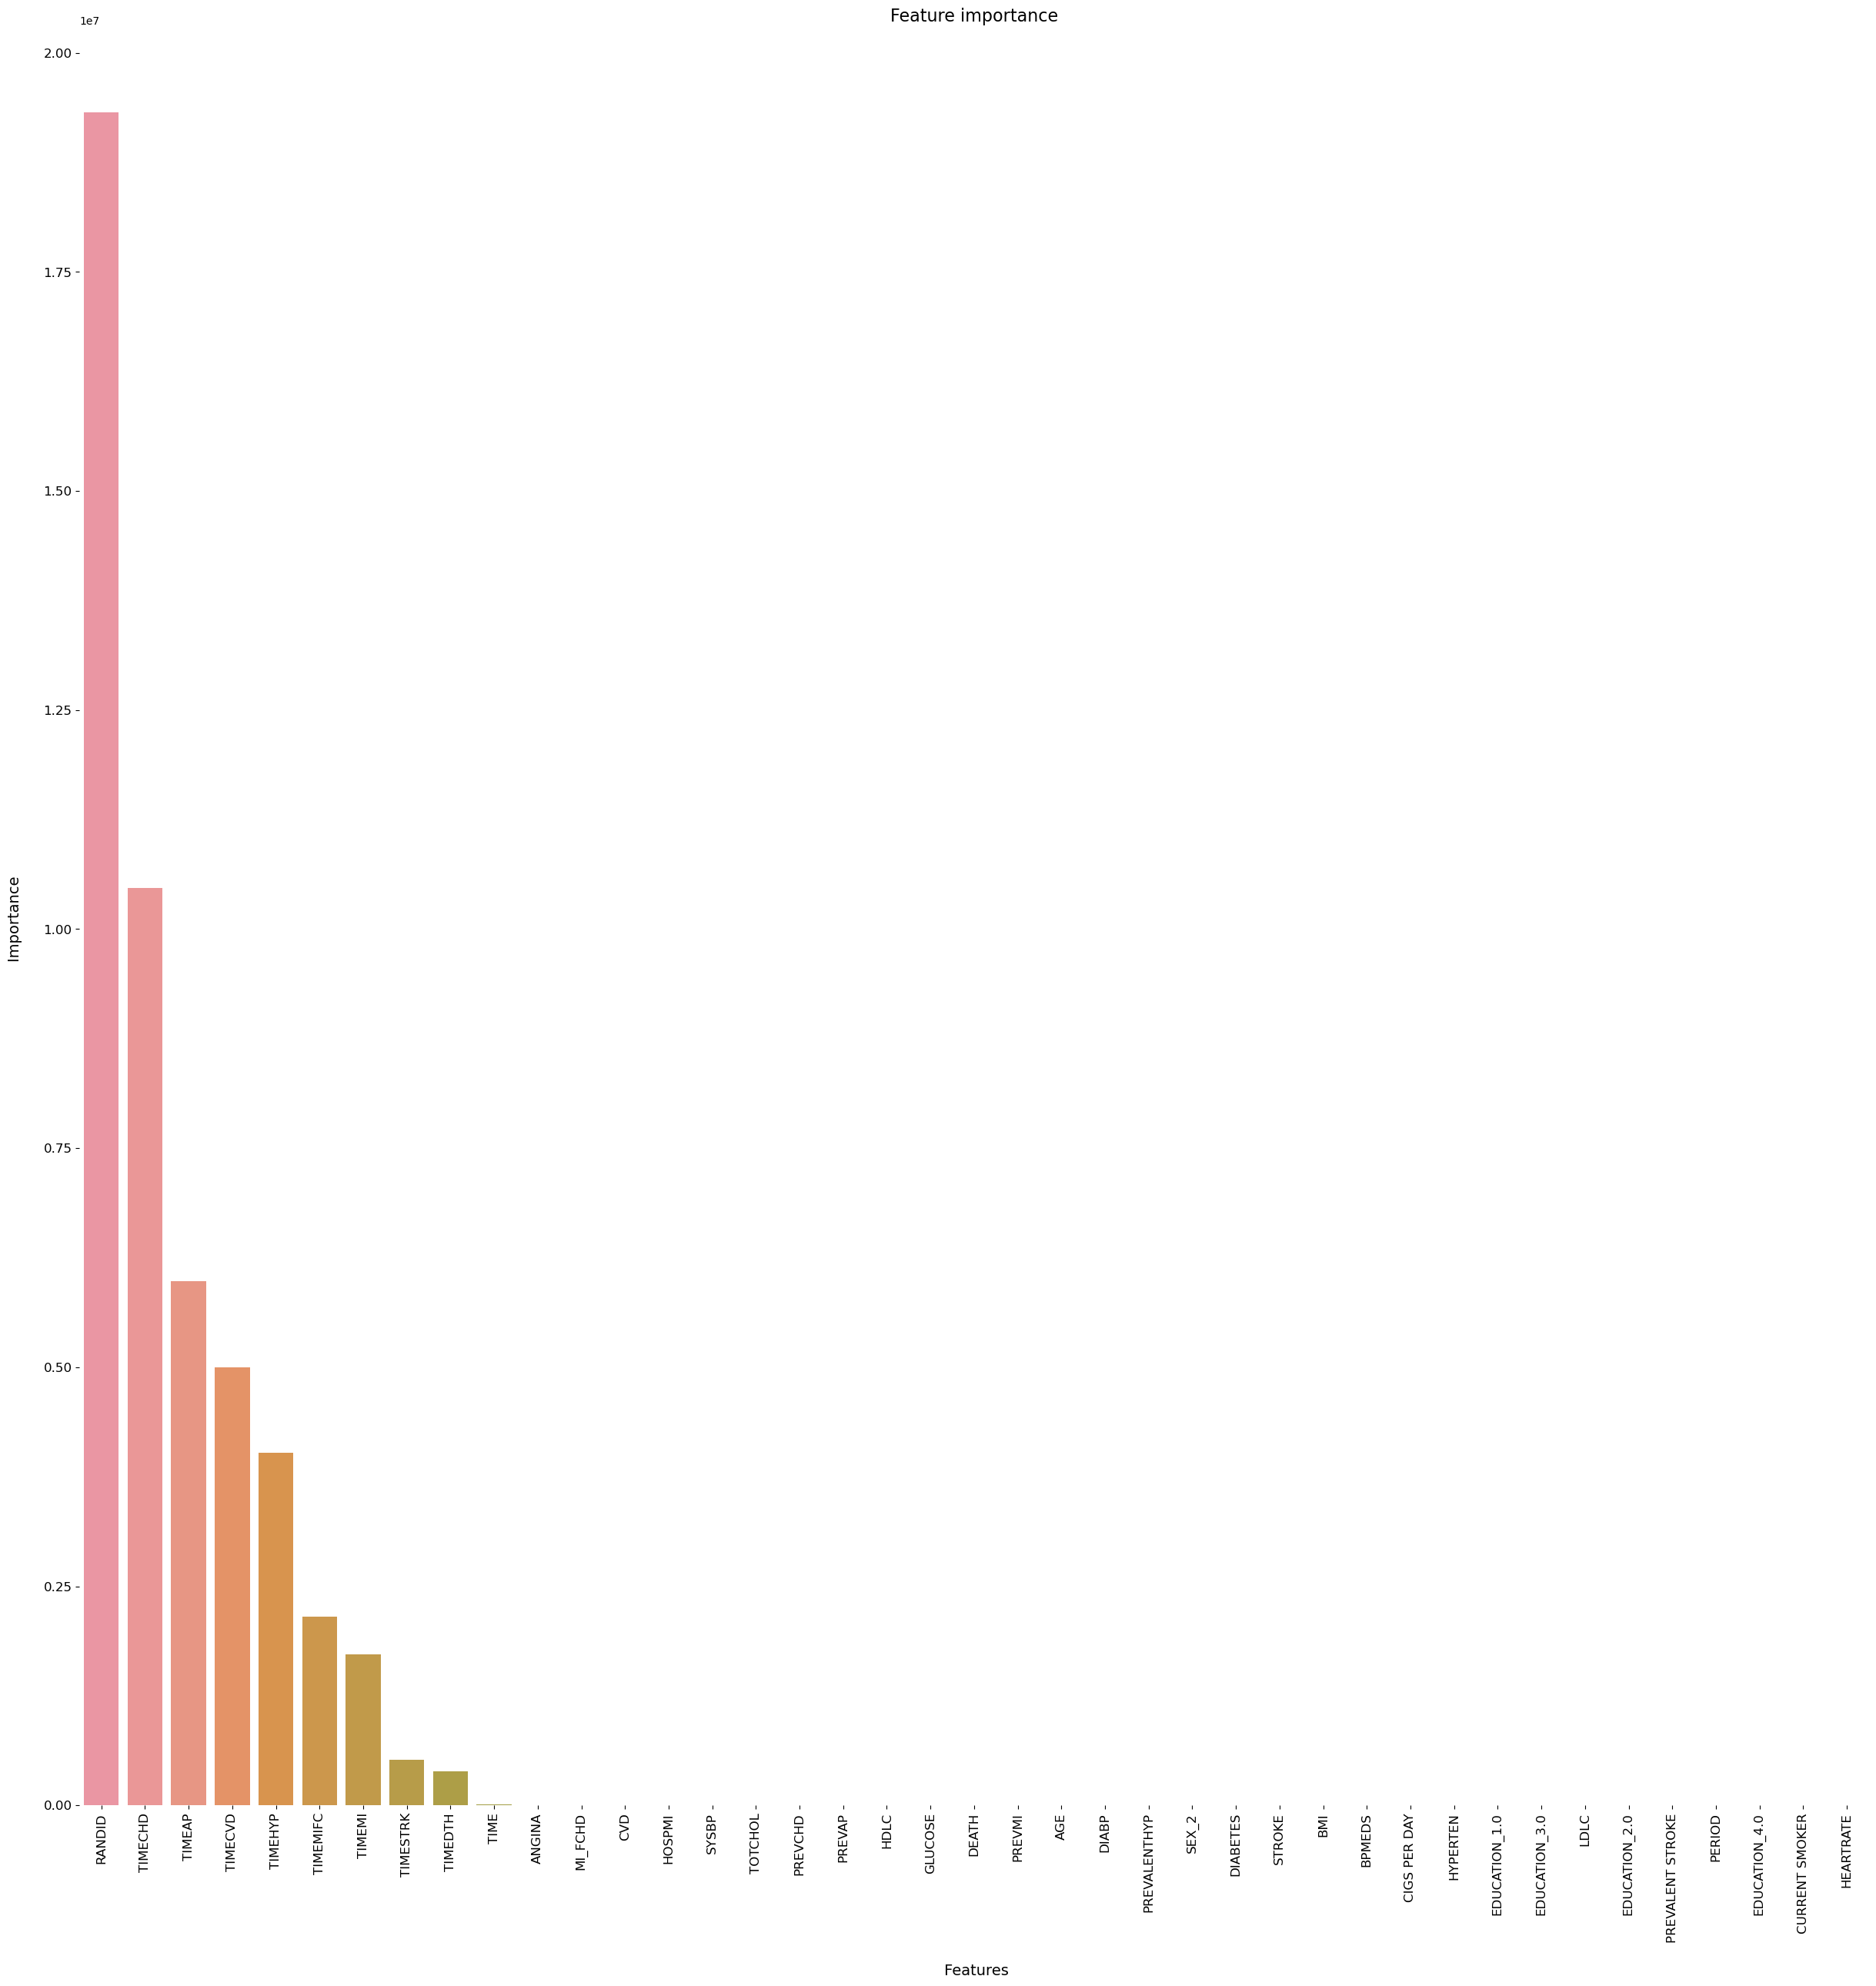

In [24]:
plt.figure(figsize=(30,30))
sns.barplot(x='Feature', y='Score', data=feature_scores)
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

In [25]:
X_selected = df2[["TIMEAP", "TIMEMI", "TIMEMIFC", "TIMECHD", "TIMESTRK", "TIMECVD", "TIMEDTH", "TIMEHYP", "AGE", "SYSBP", "PREVCHD", "PREVAP", "PREVMI", "PREVALENTHYP", "DEATH", "CVD", "ANGINA", "HOSPMI", "MI_FCHD", "ANYCHD"]]
X_selected.head()

,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,AGE,SYSBP,PREVCHD,PREVAP,PREVMI,PREVALENTHYP,DEATH,CVD,ANGINA,HOSPMI,MI_FCHD,ANYCHD
0,8766,6438,6438,6438,8766,6438,8766,8766,39,106.0,0,0,0,0,0,1,0,1,1,1
1,8766,6438,6438,6438,8766,6438,8766,8766,52,121.0,0,0,0,0,0,1,0,1,1,1
2,8766,8766,8766,8766,8766,8766,8766,8766,46,121.0,0,0,0,0,0,0,0,0,0,0
3,8766,8766,8766,8766,8766,8766,8766,8766,52,105.0,0,0,0,0,0,0,0,0,0,0
4,8766,8766,8766,8766,8766,8766,8766,8766,58,108.0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Separate features (X) and target (y) from the resampled data
X_resampled_selected = X_resampled[["TIMEAP", "TIMEMI", "TIMEMIFC", "TIMECHD", "TIMESTRK", "TIMECVD", "TIMEDTH", "TIMEHYP", "AGE",  "SYSBP", "PREVCHD", "PREVAP", "PREVMI", "PREVALENTHYP", "DEATH", "CVD", "MI_FCHD", "ANGINA", "HOSPMI"]]
y_resampled_selected = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled_selected, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (13550, 19)
Shape of X_test: (3388, 19)
Shape of y_train: (13550,)
Shape of y_test: (3388,)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Class 0: 8469
Class 1: 8469
Proportion: 1.0 : 1


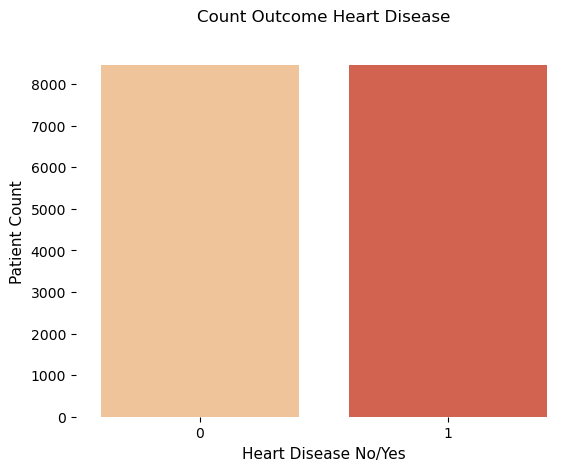

In [28]:
# Checking balance of outcome variable
target_count4 = y_resampled_selected.value_counts()
print('Class 0:', target_count4[0])
print('Class 1:', target_count4[1])
print('Proportion:', round(target_count4[0] / target_count4[1], 2), ': 1')

sns.countplot(y_resampled_selected, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

ANYCHD
1    8469
0     611
Name: count, dtype: int64


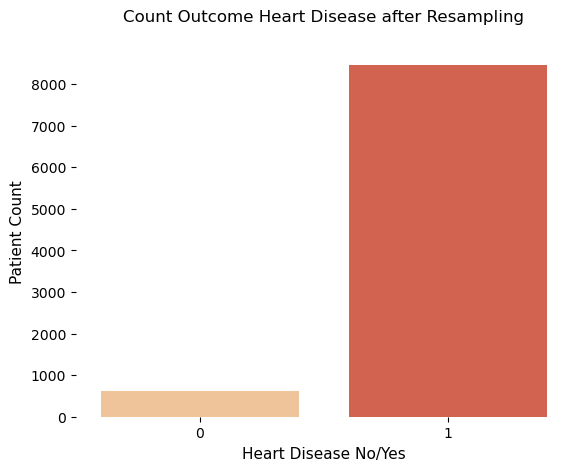

In [29]:
# Shuffle df
shuffled_y_resampled_selected = y_resampled_selected.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df4 = shuffled_y_resampled_selected.loc[shuffled_y_resampled_selected == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df4 = shuffled_y_resampled_selected.loc[shuffled_y_resampled_selected == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df4 = pd.concat([CHD_df4, non_CHD_df4])

# check new class counts
print(normalized_df4.value_counts())

# plot new count
sns.countplot(x=normalized_df4, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

In [30]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=42, max_iter=1000)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confusion matrix
[[1734    0]
 [   0 1654]]


Accuracy of Logistic Regression: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1734
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3388
   macro avg       1.00      1.00      1.00      3388
weighted avg       1.00      1.00      1.00      3388



In [31]:
m2 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confusion matrix
[[1733    1]
 [   0 1654]]


Accuracy of DecisionTreeClassifier: 99.97048406139315 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1734
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3388
   macro avg       1.00      1.00      1.00      3388
weighted avg       1.00      1.00      1.00      3388



In [32]:
m4 = 'Random Forest Classfier'
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confusion matrix
[[1734    0]
 [   0 1654]]


Accuracy of Random Forest: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1734
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3388
   macro avg       1.00      1.00      1.00      3388
weighted avg       1.00      1.00      1.00      3388



In [33]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier(random_state=42)
gvc.fit(X_train, y_train)
gvc_predicted = gvc.predict(X_test)
gvc_conf_matrix = confusion_matrix(y_test, gvc_predicted)
gvc_acc_score = accuracy_score(y_test, gvc_predicted)
print("confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(y_test,gvc_predicted))

confusion matrix
[[1734    0]
 [   2 1652]]


Accuracy of Gradient Boosting Classifier: 99.9409681227863 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1734
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3388
   macro avg       1.00      1.00      1.00      3388
weighted avg       1.00      1.00      1.00      3388



In [34]:
m6 = 'Support Vector Classifier'
svm =  SVC(random_state=42, kernel='linear')
svm.fit(X_train_scaled, y_train)
svm_predicted = svm.predict(X_test_scaled)
svm_conf_matrix = confusion_matrix(y_test, svm_predicted)
svm_acc_score = accuracy_score(y_test, svm_predicted)
print("confusion matrix")
print(svm_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svm_acc_score*100,'\n')
print(classification_report(y_test,svm_predicted))

confusion matrix
[[1734    0]
 [   3 1651]]


Accuracy of Support Vector Classifier: 99.91145218417947 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1734
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3388
   macro avg       1.00      1.00      1.00      3388
weighted avg       1.00      1.00      1.00      3388



In [35]:
m7 = 'AdaBoost Classifier'
ABC =  AdaBoostClassifier(random_state=42)
ABC.fit(X_train, y_train)
ABC_predicted = ABC.predict(X_test)
ABC_conf_matrix = confusion_matrix(y_test, ABC_predicted)
ABC_acc_score = accuracy_score(y_test, ABC_predicted)
print("confusion matrix")
print(ABC_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",ABC_acc_score*100,'\n')
print(classification_report(y_test,ABC_predicted))

confusion matrix
[[1734    0]
 [   0 1654]]


Accuracy of Support Vector Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1734
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3388
   macro avg       1.00      1.00      1.00      3388
weighted avg       1.00      1.00      1.00      3388



In [36]:
m8 = 'XGBoost Classifier'
XGB =  XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
XGB.fit(X_train, y_train)
XGB_predicted = XGB.predict(X_test)
XGB_conf_matrix = confusion_matrix(y_test, XGB_predicted)
XGB_acc_score = accuracy_score(y_test, XGB_predicted)
print("confusion matrix")
print(XGB_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",XGB_acc_score*100,'\n')
print(classification_report(y_test,XGB_predicted))

confusion matrix
[[1734    0]
 [   0 1654]]


Accuracy of Support Vector Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1734
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3388
   macro avg       1.00      1.00      1.00      3388
weighted avg       1.00      1.00      1.00      3388



In [37]:
m9 = 'CatBoost Classifier'
CB =  CatBoostClassifier(verbose=0, random_state=42)
CB.fit(X_train, y_train)
CB_predicted = CB.predict(X_test)
CB_conf_matrix = confusion_matrix(y_test, CB_predicted)
CB_acc_score = accuracy_score(y_test, CB_predicted)
print("confusion matrix")
print(CB_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",CB_acc_score*100,'\n')
print(classification_report(y_test,CB_predicted))

confusion matrix
[[1734    0]
 [   0 1654]]


Accuracy of Support Vector Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1734
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3388
   macro avg       1.00      1.00      1.00      3388
weighted avg       1.00      1.00      1.00      3388



In [38]:
model_ev2 = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Treer',
              'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'AdaBoost', 'XGBoost', 'CatBoost'],
    'Accuracy': [lr_acc_score*100, dt_acc_score*100,
                 rf_acc_score*100, gvc_acc_score*100, svm_acc_score*100, ABC_acc_score*100, XGB_acc_score*100, CB_acc_score*100]
})
model_ev2

,Model,Accuracy
0,Logistic Regression,100.000000
1,Decision Treer,99.970484
2,Random Forest,100.000000
3,Gradient Boosting,99.940968
4,Support Vector Machine,99.911452
5,AdaBoost,100.000000
6,XGBoost,100.000000
7,CatBoost,100.000000


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [40]:
# Reshape data for RNN and LSTM (samples, time steps, features)
X_train_rnn_lstm = np.expand_dims(X_train_scaled, axis=1)
X_test_rnn_lstm = np.expand_dims(X_test_scaled, axis=1)

In [41]:
# Dictionary to store accuracy scores
model_accuracies = {}

# MLP (Neural Network)
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])
mlp.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0) # Reduced epochs for faster execution
y_pred_mlp_prob = mlp.predict(X_test_scaled)
y_pred_mlp = (y_pred_mlp_prob > 0.5).astype("int32")
model_accuracies['MLP'] = accuracy_score(y_test, y_pred_mlp)

# Simple RNN
rnn = Sequential([
    SimpleRNN(32, input_shape=(X_train_rnn_lstm.shape[1], X_train_rnn_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])
rnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn.fit(X_train_rnn_lstm, y_train, epochs=20, batch_size=32, verbose=0) # Reduced epochs
y_pred_rnn_prob = rnn.predict(X_test_rnn_lstm)
y_pred_rnn = (y_pred_rnn_prob > 0.5).astype("int32")
model_accuracies['Simple RNN'] = accuracy_score(y_test, y_pred_rnn)

# LSTM
lstm = Sequential([
    LSTM(32, input_shape=(X_train_rnn_lstm.shape[1], X_train_rnn_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])
lstm.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_rnn_lstm, y_train, epochs=20, batch_size=32, verbose=0) # Reduced epochs
y_pred_lstm_prob = lstm.predict(X_test_rnn_lstm)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype("int32")
model_accuracies['LSTM'] = accuracy_score(y_test, y_pred_lstm)


# Print the accuracy scores
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model Accuracies:
MLP: 0.9997
Simple RNN: 0.9994
LSTM: 0.9994


In [42]:
# Reshape data for CNN (samples, time steps, features)
# For a 1D CNN, time steps would be the number of features, and features would be 1
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

print("Shape of X_train for CNN:", X_train_cnn.shape)
print("Shape of X_test for CNN:", X_test_cnn.shape)

Shape of X_train for CNN: (13550, 19, 1)
Shape of X_test for CNN: (3388, 19, 1)


In [43]:
# 1D CNN Model
cnn = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=0) # Reduced epochs for faster execution

# Evaluate the CNN model
y_pred_cnn_prob = cnn.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype("int32")
cnn_accuracy = accuracy_score(y_test, y_pred_cnn)

print("CNN Model Accuracy:", cnn_accuracy)

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
CNN Model Accuracy: 1.0


In [44]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

print("Hyperparameter grids defined.")

Hyperparameter grids defined.


In [45]:
# Hyperparameter grids for additional models

# Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # 'liblinear' and 'saga' support l1 and l2
}

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# CatBoost
param_grid_catb = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 4, 5],
    'l2_leaf_reg': [1, 3, 5]
}

# MLP (Neural Network) - Example grid
# Hyperparameters for deep learning models are often more complex and might involve
# tuning the number of layers, number of neurons per layer, activation functions, etc.
param_grid_mlp = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# RNN and LSTM - Example grids
# Tuning RNNs and LSTMs can involve parameters like the number of units,
# dropout, recurrent_dropout, etc.
param_grid_rnn_lstm = {
    'units': [32, 64],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive']
    # Add other relevant parameters like dropout, recurrent_dropout if needed
}

# CNN (1D CNN) - Example grid
# Tuning CNNs can involve parameters like the number of filters, kernel size,
# pooling size, etc.
param_grid_cnn = {
    'filters': [32, 64],
    'kernel_size': [2, 3, 5],
    'pool_size': [2],
    'learning_rate': ['constant', 'adaptive']
    # Add other relevant parameters if needed
}

print("Hyperparameter grids for additional models defined.")

Hyperparameter grids for additional models defined.


In [46]:
tuned_model_accuracies = {}

In [47]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
y_pred_tuned_dt = best_dt.predict(X_test)
tuned_model_accuracies['Tuned Decision Tree'] = accuracy_score(y_test, y_pred_tuned_dt)
print("Tuned Decision Tree - Best Hyperparameters:", grid_search_dt.best_params_)
print("Tuned Decision Tree - Accuracy:", tuned_model_accuracies['Tuned Decision Tree'])

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
y_pred_tuned_gb = best_gb.predict(X_test)
tuned_model_accuracies['Tuned Gradient Boosting'] = accuracy_score(y_test, y_pred_tuned_gb)
print("Tuned Gradient Boosting - Best Hyperparameters:", grid_search_gb.best_params_)
print("Tuned Gradient Boosting - Accuracy:", tuned_model_accuracies['Tuned Gradient Boosting'])

# AdaBoost
ada = AdaBoostClassifier(random_state=42)
grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5)
grid_search_ada.fit(X_train, y_train)
best_ada = grid_search_ada.best_estimator_
y_pred_tuned_ada = best_ada.predict(X_test)
tuned_model_accuracies['Tuned AdaBoost'] = accuracy_score(y_test, y_pred_tuned_ada)
print("Tuned AdaBoost - Best Hyperparameters:", grid_search_ada.best_params_)
print("Tuned AdaBoost - Accuracy:", tuned_model_accuracies['Tuned AdaBoost'])

# SVM
svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)
best_svm = grid_search_svm.best_estimator_
y_pred_tuned_svm = best_svm.predict(X_test_scaled)
tuned_model_accuracies['Tuned SVM'] = accuracy_score(y_test, y_pred_tuned_svm)
print("Tuned SVM - Best Hyperparameters:", grid_search_svm.best_params_)
print("Tuned SVM - Accuracy:", tuned_model_accuracies['Tuned SVM'])

Tuned Decision Tree - Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Decision Tree - Accuracy: 0.9997048406139315
Tuned Gradient Boosting - Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Tuned Gradient Boosting - Accuracy: 1.0
Tuned AdaBoost - Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 200}
Tuned AdaBoost - Accuracy: 1.0
Tuned SVM - Best Hyperparameters: {'C': 10, 'kernel': 'linear'}
Tuned SVM - Accuracy: 0.999409681227863


In [48]:
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=10)
grid_search_lr.fit(X_train_scaled, y_train) # Use scaled data for LR
best_lr = grid_search_lr.best_estimator_
y_pred_tuned_lr = best_lr.predict(X_test_scaled) # Use scaled data for prediction
tuned_model_accuracies['Tuned Logistic Regression'] = accuracy_score(y_test, y_pred_tuned_lr)
print("Tuned Logistic Regression - Best Hyperparameters:", grid_search_lr.best_params_)
print("Tuned Logistic Regression - Accuracy:", tuned_model_accuracies['Tuned Logistic Regression'])

Tuned Logistic Regression - Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression - Accuracy: 0.9991145218417946


In [49]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=10)
grid_search_rf.fit(X_train, y_train) # Use unscaled data for RF
best_rf = grid_search_rf.best_estimator_
y_pred_tuned_rf = best_rf.predict(X_test) # Use unscaled data for prediction
tuned_model_accuracies['Tuned Random Forest'] = accuracy_score(y_test, y_pred_tuned_rf)
print("Tuned Random Forest - Best Hyperparameters:", grid_search_rf.best_params_)
print("Tuned Random Forest - Accuracy:", tuned_model_accuracies['Tuned Random Forest'])

Tuned Random Forest - Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest - Accuracy: 1.0


In [50]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=10)
grid_search_xgb.fit(X_train, y_train) # Use unscaled data for XGBoost
best_xgb = grid_search_xgb.best_estimator_
y_pred_tuned_xgb = best_xgb.predict(X_test) # Use unscaled data for prediction
tuned_model_accuracies['Tuned XGBoost'] = accuracy_score(y_test, y_pred_tuned_xgb)
print("Tuned XGBoost - Best Hyperparameters:", grid_search_xgb.best_params_)
print("Tuned XGBoost - Accuracy:", tuned_model_accuracies['Tuned XGBoost'])

Tuned XGBoost - Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Tuned XGBoost - Accuracy: 1.0


In [51]:
# CatBoost
catb = CatBoostClassifier(verbose=0, random_state=42)
grid_search_catb = GridSearchCV(catb, param_grid_catb, cv=10)
grid_search_catb.fit(X_train, y_train) # Use unscaled data for CatBoost
best_catb = grid_search_catb.best_estimator_
y_pred_tuned_catb = best_catb.predict(X_test) # Use unscaled data for prediction
tuned_model_accuracies['Tuned CatBoost'] = accuracy_score(y_test, y_pred_tuned_catb)
print("Tuned CatBoost - Best Hyperparameters:", grid_search_catb.best_params_)
print("Tuned CatBoost - Accuracy:", tuned_model_accuracies['Tuned CatBoost'])

Tuned CatBoost - Best Hyperparameters: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Tuned CatBoost - Accuracy: 1.0


In [52]:
# Define functions to create and compile the neural network models
def create_mlp_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_simple_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(32, input_shape=(input_shape[1], input_shape[2])),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(32, input_shape=(input_shape[1], input_shape[2])),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Scale the features for neural network models on the entire selected dataset
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_resampled)

# Reshape the scaled data for Simple RNN and LSTM models
X_selected_rnn_lstm = np.expand_dims(X_selected_scaled, axis=1)

# Lists to store accuracy scores for each fold
mlp_accuracies = []
rnn_accuracies = []
lstm_accuracies = []

# Iterate through the splits and train/evaluate models
for fold, (train_index, test_index) in enumerate(skf.split(X_selected_scaled, y_resampled)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold_scaled, X_test_fold_scaled = X_selected_scaled[train_index], X_selected_scaled[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Reshape for RNN and LSTM
    X_train_fold_rnn_lstm = np.expand_dims(X_train_fold_scaled, axis=1)
    X_test_fold_rnn_lstm = np.expand_dims(X_test_fold_scaled, axis=1)

    # Train and evaluate MLP
    mlp_model = create_mlp_model(X_train_fold_scaled.shape[1])
    mlp_model.fit(X_train_fold_scaled, y_train_fold, epochs=60, batch_size=50, verbose=0)
    _, mlp_accuracy = mlp_model.evaluate(X_test_fold_scaled, y_test_fold, verbose=0)
    mlp_accuracies.append(mlp_accuracy)

    # Train and evaluate Simple RNN
    rnn_model = create_simple_rnn_model(X_train_fold_rnn_lstm.shape)
    rnn_model.fit(X_train_fold_rnn_lstm, y_train_fold, epochs=65, batch_size=50, verbose=0)
    _, rnn_accuracy = rnn_model.evaluate(X_test_fold_rnn_lstm, y_test_fold, verbose=0)
    rnn_accuracies.append(rnn_accuracy)

    # Train and evaluate LSTM
    lstm_model = create_lstm_model(X_train_fold_rnn_lstm.shape)
    lstm_model.fit(X_train_fold_rnn_lstm, y_train_fold, epochs=60, batch_size=50, verbose=0)
    _, lstm_accuracy = lstm_model.evaluate(X_test_fold_rnn_lstm, y_test_fold, verbose=0)
    lstm_accuracies.append(lstm_accuracy)


# Calculate average accuracies
avg_mlp_accuracy = np.mean(mlp_accuracies)
avg_rnn_accuracy = np.mean(rnn_accuracies)
avg_lstm_accuracy = np.mean(lstm_accuracies)

# Store average accuracies in tuned_model_accuracies dictionary
tuned_model_accuracies['MLP Cross-Validation'] = avg_mlp_accuracy
tuned_model_accuracies['Simple RNN Cross-Validation'] = avg_rnn_accuracy
tuned_model_accuracies['LSTM Cross-Validation'] = avg_lstm_accuracy

# Print average cross-validation accuracies
print("\nAverage Cross-Validation Accuracies:")
print(f"MLP: {avg_mlp_accuracy:.4f}")
print(f"Simple RNN: {avg_rnn_accuracy:.4f}")
print(f"LSTM: {avg_lstm_accuracy:.4f}")

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

Average Cross-Validation Accuracies:
MLP: 0.9995
Simple RNN: 0.9999
LSTM: 0.9998


In [53]:
# Lists to store accuracy scores for each fold for traditional models
lr_accuracies = []
dt_accuracies = []
rf_accuracies = []
gb_accuracies = []
svm_accuracies = []
ada_accuracies = []
xgb_accuracies = []
catb_accuracies = []

# Iterate through the splits and train/evaluate models
for fold, (train_index, test_index) in enumerate(skf.split(X_resampled, y_resampled)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold, X_test_fold = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Scale data for models that benefit from it
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)

    # Train and evaluate Logistic Regression
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train_fold_scaled, y_train_fold)
    lr_accuracy = accuracy_score(y_test_fold, lr_model.predict(X_test_fold_scaled))
    lr_accuracies.append(lr_accuracy)

    # Train and evaluate Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_fold, y_train_fold)
    dt_accuracy = accuracy_score(y_test_fold, dt_model.predict(X_test_fold))
    dt_accuracies.append(dt_accuracy)

    # Train and evaluate Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)
    rf_accuracy = accuracy_score(y_test_fold, rf_model.predict(X_test_fold))
    rf_accuracies.append(rf_accuracy)

    # Train and evaluate Gradient Boosting
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train_fold, y_train_fold)
    gb_accuracy = accuracy_score(y_test_fold, gb_model.predict(X_test_fold))
    gb_accuracies.append(gb_accuracy)

    # Train and evaluate SVM
    svm_model = SVC(random_state=42, kernel='linear')
    svm_model.fit(X_train_fold_scaled, y_train_fold)
    svm_accuracy = accuracy_score(y_test_fold, svm_model.predict(X_test_fold_scaled))
    svm_accuracies.append(svm_accuracy)

    # Train and evaluate AdaBoost
    ada_model = AdaBoostClassifier(random_state=42)
    ada_model.fit(X_train_fold, y_train_fold)
    ada_accuracy = accuracy_score(y_test_fold, ada_model.predict(X_test_fold))
    ada_accuracies.append(ada_accuracy)

    # Train and evaluate XGBoost
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train_fold, y_train_fold)
    xgb_accuracy = accuracy_score(y_test_fold, xgb_model.predict(X_test_fold))
    xgb_accuracies.append(xgb_accuracy)

    # Train and evaluate CatBoost
    catb_model = CatBoostClassifier(verbose=0, random_state=42)
    catb_model.fit(X_train_fold, y_train_fold)
    catb_accuracy = accuracy_score(y_test_fold, catb_model.predict(X_test_fold))
    catb_accuracies.append(catb_accuracy)


# Calculate average accuracies for traditional models
avg_lr_accuracy = np.mean(lr_accuracies)
avg_dt_accuracy = np.mean(dt_accuracies)
avg_rf_accuracy = np.mean(rf_accuracies)
avg_gb_accuracy = np.mean(gb_accuracies)
avg_svm_accuracy = np.mean(svm_accuracies)
avg_ada_accuracy = np.mean(ada_accuracies)
avg_xgb_accuracy = np.mean(xgb_accuracies)
avg_catb_accuracy = np.mean(catb_accuracies)

# Store average accuracies in tuned_model_accuracies dictionary
tuned_model_accuracies['Logistic Regression Cross-Validation'] = avg_lr_accuracy
tuned_model_accuracies['Decision Tree Cross-Validation'] = avg_dt_accuracy
tuned_model_accuracies['Random Forest Cross-Validation'] = avg_rf_accuracy
tuned_model_accuracies['Gradient Boosting Cross-Validation'] = avg_gb_accuracy
tuned_model_accuracies['SVM Cross-Validation'] = avg_svm_accuracy
tuned_model_accuracies['AdaBoost Cross-Validation'] = avg_ada_accuracy
tuned_model_accuracies['XGBoost Cross-Validation'] = avg_xgb_accuracy
tuned_model_accuracies['CatBoost Cross-Validation'] = avg_catb_accuracy


# Print average cross-validation accuracies for traditional models
print("\nAverage Cross-Validation Accuracies (Traditional Models):")
print(f"Logistic Regression: {avg_lr_accuracy:.4f}")
print(f"Decision Tree: {avg_dt_accuracy:.4f}")
print(f"Random Forest: {avg_rf_accuracy:.4f}")
print(f"Gradient Boosting: {avg_gb_accuracy:.4f}")
print(f"SVM: {avg_svm_accuracy:.4f}")
print(f"AdaBoost: {avg_ada_accuracy:.4f}")
print(f"XGBoost: {avg_xgb_accuracy:.4f}")
print(f"CatBoost: {avg_catb_accuracy:.4f}")

# Display the updated tuned_model_accuracies dictionary
print("\nUpdated Tuned Model Accuracies:")
display(tuned_model_accuracies)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

Average Cross-Validation Accuracies (Traditional Models):
Logistic Regression: 0.9968
Decision Tree: 0.9983
Random Forest: 0.9996
Gradient Boosting: 0.9994
SVM: 0.9992
AdaBoost: 0.9999
XGBoost: 0.9999
CatBoost: 0.9999

Updated Tuned Model Accuracies:


{'Tuned Decision Tree': 0.9997048406139315,
 'Tuned Gradient Boosting': 1.0,
 'Tuned AdaBoost': 1.0,
 'Tuned SVM': 0.999409681227863,
 'Tuned Logistic Regression': 0.9991145218417946,
 'Tuned Random Forest': 1.0,
 'Tuned XGBoost': 1.0,
 'Tuned CatBoost': 1.0,
 'MLP Cross-Validation': 0.9994686961174011,
 'Simple RNN Cross-Validation': 0.9998819351196289,
 'LSTM Cross-Validation': 0.9998229026794434,
 'Logistic Regression Cross-Validation': 0.996752776171409,
 'Decision Tree Cross-Validation': 0.9983468285747052,
 'Random Forest Cross-Validation': 0.9996457738788038,
 'Gradient Boosting Cross-Validation': 0.9994095940830784,
 'SVM Cross-Validation': 0.9991734142873527,
 'AdaBoost Cross-Validation': 0.9998819188166157,
 'XGBoost Cross-Validation': 0.9999409681227863,
 'CatBoost Cross-Validation': 0.9999409681227863}

In [54]:
# Stratified K-Fold Cross-Validation for CNN model

cnn_accuracies = []

for fold, (train_index, test_index) in enumerate(skf.split(X_train_scaled, y_train)):
    print(f"Fold {fold+1}/{n_splits}")

    # Prepare train and test sets for CNN (reshape for Conv1D)
    X_train_fold_cnn = np.expand_dims(X_train_scaled[train_index], axis=2)
    X_test_fold_cnn = np.expand_dims(X_train_scaled[test_index], axis=2)
    y_train_fold_cnn = y_train.iloc[train_index]
    y_test_fold_cnn = y_train.iloc[test_index]

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_fold_cnn.shape[1], X_train_fold_cnn.shape[2])),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    cnn_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train CNN model
    cnn_model.fit(X_train_fold_cnn, y_train_fold_cnn, epochs=40, batch_size=20, verbose=0)

    # Evaluate CNN model
    _, cnn_accuracy = cnn_model.evaluate(X_test_fold_cnn, y_test_fold_cnn, verbose=0)
    cnn_accuracies.append(cnn_accuracy)

# Calculate average accuracy
avg_cnn_accuracy = np.mean(cnn_accuracies)
print(f"\nAverage CNN Cross-Validation Accuracy: {avg_cnn_accuracy:.4f}")

# Store in tuned_model_accuracies
tuned_model_accuracies['CNN Cross-Validation'] = avg_cnn_accuracy

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

Average CNN Cross-Validation Accuracy: 0.9981


In [55]:
# Try increasing epochs, batch size, and model complexity for MLP, LSTM, RNN, CNN

# CNN
cnn_improved = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_improved.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_improved.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_cnn_improved = (cnn_improved.predict(X_test_cnn) > 0.5).astype("int32")
cnn_improved_acc = accuracy_score(y_test, y_pred_cnn_improved)
print(f"Improved CNN Accuracy: {cnn_improved_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Improved CNN Accuracy: 1.0000


In [56]:
# MLP
mlp= Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
mlp.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=0)
y_pred_mlp_prob = (mlp.predict(X_test_scaled) > 0.5).astype("int32")
mlp_improved_acc = accuracy_score(y_test, y_pred_mlp_prob)
print(f"MLP Accuracy: {mlp_improved_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MLP Accuracy: 0.9994


In [57]:
# Use scaled data for MLP grid search
mlp_clf = MLPClassifier(max_iter=100, random_state=42)
grid_search_mlp = GridSearchCV(mlp_clf, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train_scaled, y_train)
best_mlp = grid_search_mlp.best_estimator_
y_pred_tuned_mlp = best_mlp.predict(X_test_scaled)
mlp_grid_acc = accuracy_score(y_test, y_pred_tuned_mlp)
print("Tuned MLP - Best Hyperparameters:", grid_search_mlp.best_params_)
print("Tuned MLP - Accuracy:", mlp_grid_acc)

Tuned MLP - Best Hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'solver': 'adam'}
Tuned MLP - Accuracy: 0.9997048406139315


In [60]:
# LSTM
lstm_improved = Sequential([
    LSTM(64, input_shape=(X_train_rnn_lstm.shape[1], X_train_rnn_lstm.shape[2]), return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
lstm_improved.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_improved.fit(X_train_rnn_lstm, y_train, epochs=15, batch_size=30, verbose=0)
y_pred_lstm_improved = (lstm_improved.predict(X_test_rnn_lstm) > 0.5).astype("int32")
lstm_improved_acc = accuracy_score(y_test, y_pred_lstm_improved)
print(f"Improved LSTM Accuracy: {lstm_improved_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Improved LSTM Accuracy: 0.9976


In [59]:
# RNN
rnn_improved = Sequential([
    SimpleRNN(64, input_shape=(X_train_rnn_lstm.shape[1], X_train_rnn_lstm.shape[2]), return_sequences=True),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
rnn_improved.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_improved.fit(X_train_rnn_lstm, y_train, epochs=65, batch_size=85, verbose=0)
y_pred_rnn_improved = (rnn_improved.predict(X_test_rnn_lstm) > 0.5).astype("int32")
rnn_improved_acc = accuracy_score(y_test, y_pred_rnn_improved)
print(f"Improved RNN Accuracy: {rnn_improved_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Improved RNN Accuracy: 0.9997
